# **Bank Marketing**

#### **Soure:** Dataset from https://archive.ics.uci.edu/dataset/222/bank+marketing

## **Importing libraries**

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import FuncFormatter

In [3]:
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE, RandomOverSampler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, r2_score

In [4]:
import warnings
warnings.filterwarnings('ignore')

## **Dataset view**

In [5]:
bank = pd.read_csv("/Users/fuenganh/Desktop/bank-additional-full.csv", sep=";")
bank.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [6]:
bank['previous'].value_counts()

previous
0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64

## **Dataset information**

In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
bank['y'] = bank['y'].map({'yes': 1, 'no': 0})

### **1. Checking for unique values in all attributes**

In [9]:
bank.nunique().sort_values(ascending=True)

y                    2
contact              2
default              3
housing              3
loan                 3
poutcome             3
marital              4
day_of_week          5
education            8
previous             8
emp.var.rate        10
month               10
nr.employed         11
job                 12
cons.price.idx      26
cons.conf.idx       26
pdays               27
campaign            42
age                 78
euribor3m          316
duration          1544
dtype: int64

### **2. Checking for missing values in each column**
- No missing values in our dataset

In [10]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<u>_Nhận xét:_</u>  
- Dữ liệu không có missing values


### **3. Check duplicate**

In [11]:
bank.duplicated().sum()

12

- Confirm lại các rows bị duplicated trước khi remove chúng

In [12]:
bank.loc[bank.duplicated(keep=False)]

age          job   marital            education  default housing loan  \
1265    39  blue-collar   married             basic.6y       no      no   no   
1266    39  blue-collar   married             basic.6y       no      no   no   
12260   36      retired   married              unknown       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14155   27   technician    single  professional.course       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16819   47   technician  divorced          high.school       no     yes   no   
16956   47   technician  divorced          high.school       no     yes   no   
18464   32   technician    single  professional.course       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20072   55     services   married          high.school  unknown      no   no   
20216   55     services   married          high.school  unknown      no   no   
20531   41   technician   married  professional.course       no     yes   no   
20534   41   technician   married  professional.course       no     yes   no   
25183   39       admin.   married    university.degree       no      no   no   
25217   39       admin.   married    university.degree       no      no   no   
28476   24     services    single          high.school       no     yes   no   
28477   24     services    single          high.school       no     yes   no   
32505   35       admin.   married    university.degree       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36950   45       admin.   married    university.degree       no      no   no   
36951   45       admin.   married    university.degree       no      no   no   
38255   71      retired    single    university.degree       no      no   no   
38281   71      retired    single    university.degree       no      no   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
1265   telephone   may         thu  ...         1    999         0   
1266   telephone   may         thu  ...         1    999         0   
12260  telephone   jul         thu  ...         1    999         0   
12261  telephone   jul         thu  ...         1    999         0   
14155   cellular   jul         mon  ...         2    999         0   
14234   cellular   jul         mon  ...         2    999         0   
16819   cellular   jul         thu  ...         3    999         0   
16956   cellular   jul         thu  ...         3    999         0   
18464   cellular   jul         thu  ...         1    999         0   
18465   cellular   jul         thu  ...         1    999         0   
20072   cellular   aug         mon  ...         1    999         0   
20216   cellular   aug         mon  ...         1    999         0   
20531   cellular   aug         tue  ...         1    999         0   
20534   cellular   aug         tue  ...         1    999         0   
25183   cellular   nov         tue  ...         2    999         0   
25217   cellular   nov         tue  ...         2    999         0   
28476   cellular   apr         tue  ...         1    999         0   
28477   cellular   apr         tue  ...         1    999         0   
32505   cellular   may         fri  ...         4    999         0   
32516   cellular   may         fri  ...         4    999         0   
36950   cellular   jul         thu  ...         1    999         0   
36951   cellular   jul         thu  ...         1    999         0   
38255  telephone   oct         tue  ...         1    999         0   
38281  telephone   oct         tue  ...         1    999         0   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
1265   nonexistent          1.1          93.994          -36.4      4.855   
1266   nonexistent          1.1          93.994          -36.4      4.855   
12260  nonexistent      

In [13]:
bank = bank.drop_duplicates()

In [14]:
bank.duplicated().sum()

0

### **4. Numerical (discrete, continuous) features descriptive statistics**

In [15]:
bank.describe()

age      duration      campaign         pdays      previous  \
count  41176.00000  41176.000000  41176.000000  41176.000000  41176.000000   
mean      40.02380    258.315815      2.567879    962.464810      0.173013   
std       10.42068    259.305321      2.770318    186.937102      0.494964   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m  \
count  41176.000000    41176.000000   41176.000000  41176.000000   
mean       0.081922       93.575720     -40.502863      3.621293   
std        1.570883        0.578839       4.627860      1.734437   
min       -3.400000       92.201000     -50.800000      0.634000   
25%       -1.800000       93.075000     -42.700000      1.344000   
50%        1.100000       93.749000     -41.800000      4.857000   
75%        1.400000       93.994000     -36.400000      4.961000   
max        1.400000       94.767000     -26.900000      5.045000   

        nr.employed             y  
count  41176.000000  41176.000000  
mean    5167.034870      0.112663  
std       72.251364      0.316184  
min     4963.600000      0.000000  
25%     5099.100000      0.000000  
50%     5191.000000      0.000000  
75%     5228.100000      0.000000  
max     5228.100000      1.000000

<u>_Phân tích:_</u>  

**Sau khi đánh giá các thống kê mô tả của dữ liệu dạng số và các unique value của dữ liệu dạng categorical, ta thấy:**
- Phần lớn các biến số học có xu hướng **lệch phải**, thể hiện qua sự chênh lệch đáng kể giữa giá trị trung vị và Q3 (khoảng phân vị thứ 3).

- Nhiều biến phân loại chứa giá trị **unknown**: 'job', 'marital', 'education', 'default', 'housing', 'loan'.

- Một số biến dạng thời gian cũng bị thiếu dữ liệu, chẳng hạn như biến **month** không có dữ liệu của tháng 1 (**January**) và tháng 2 (**February**).

- Biến **day_of_week** thì thiếu dữ liệu những ngày cuối tuần **Saturday** & **Sunday**. Tuy nhiên, có thể suy luận rằng do đây là dữ liệu hoạt động telemarketing, nên những ngày cuối tuần là thời gian nghỉ của tổng đài viên, điều này có thể giải thích hợp lý cho việc không có dữ liệu vào thứ 7 và Chủ nhật.

- Đối với các biến phân loại, cần EDA thêm để xác định cách xử lý các giá trị **unknown**.


In [16]:
categorical_cols = bank.select_dtypes(include='object').columns.tolist()
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [17]:
for col in categorical_cols:
    print(f"Unique values in '{col}':")
    print(bank[col].unique())
    print("-" * 40)

Unique values in 'job':
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
----------------------------------------
Unique values in 'marital':
['married' 'single' 'divorced' 'unknown']
----------------------------------------
Unique values in 'education':
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
----------------------------------------
Unique values in 'default':
['no' 'unknown' 'yes']
----------------------------------------
Unique values in 'housing':
['no' 'yes' 'unknown']
----------------------------------------
Unique values in 'loan':
['no' 'yes' 'unknown']
----------------------------------------
Unique values in 'contact':
['telephone' 'cellular']
----------------------------------------
Unique values in 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
---------------------------------

## **Data exploration & visualization**

### pdays

In [18]:
bank['pdays'] = bank['pdays'].replace({999: -1})

## **Data pipeline**

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, classification_report

from imblearn.over_sampling import RandomOverSampler

from sklearn.base import BaseEstimator, TransformerMixin

### **Functions for Handling outliers**

In [20]:
class HandlingOutliers(BaseEstimator, TransformerMixin):
    def __init__(self, numerical_columns, factor=1.5):
        """
        Khởi tạo bộ xử lý outliers.

        Parameters:
        - numerical_columns: danh sách tên các cột số cần xử lý.
        - factor: hệ số nhân cho IQR (ví dụ, 1.5).
        """
        self.numerical_columns = numerical_columns
        self.factor = factor  # Khởi tạo factor, mặc định là 1.5.

    def fit(self, X, y=None):
        """
        COmpute Q1, Q3, IQR, lower_bound & upper_bound from train_data.
        """
        self.Q1_ = X[self.numerical_columns].quantile(0.25)
        self.Q3_ = X[self.numerical_columns].quantile(0.75)
        self.IQR_ = self.Q3_ - self.Q1_
        self.lower_bound_ = self.Q1_ - self.factor * self.IQR_
        self.upper_bound_ = self.Q3_ + self.factor * self.IQR_
        return self

    def transform(self, X, y=None):
        """
        Apply clip các giá trị vượt ngưỡng cho các cột số.
        """
        X_copy = X.copy()
        for col in self.numerical_columns:
            X_copy[col] = X_copy[col].clip(lower=self.lower_bound_[col], upper=self.upper_bound_[col])
        return X_copy


In [21]:
models = {
    "Logistic regression": LogisticRegression(),
    "Random forest": RandomForestClassifier(),
    "Naive bayes": GaussianNB(),
    "K-nearest neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(),
}

### **Pipeline**

In [22]:
import copy
import numpy as np
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

# Step 1: Split dataset into train and test
X = bank.drop(columns=['y'])
y = bank['y'].astype(int)

# categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                       'contact', 'month', 'day_of_week', 'poutcome']

# numerical columns
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous',
                     'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                     'euribor3m', 'nr.employed']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

# Step 2: Define preprocessing pipeline
# pipeline cho numerical columns
num_pipeline = Pipeline([
    ("outlier", HandlingOutliers(numerical_columns=numerical_columns, factor=1.5)),
    ("scaler", MinMaxScaler())
])

# pipeline cho categorical columns
cat_pipeline = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Kết hợp xử lý với ColumnTransformer
preprocessing = ColumnTransformer([
    ("num", num_pipeline, numerical_columns),
    ("cat", cat_pipeline, categorical_columns)
])

# tạo dict để save kết quả của từng model cho đánh giá trên tập test
test_results = {}

# cho chạy qua từng models
for model_name, model in models.items():
    print(f"\n=== Running Model: {model_name} ===")

    # lưu 5 mô hình của 5 fold
    sub_models = []

    # lưu train_score và val_score cho từng fold để so sánh hiệu suất của từng model
    train_scores = []
    val_scores = []

    # Step 4: Initialize Kfold cross-validation
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train), start=1):
         # tạo tập huấn luyện và validation cho fold hiện tại
        X_train_fold = X_train.iloc[train_idx]
        y_train_fold = y_train.iloc[train_idx]
        X_val_fold = X_train.iloc[val_idx]
        y_val_fold = y_train.iloc[val_idx]

        # Step 5: Apply preprocessing only training fold
        X_train_fold_proc = preprocessing.fit_transform(X_train_fold)    #fit transform trên tập train
        # Use the same transformation on validation
        X_val_fold_proc = preprocessing.transform(X_val_fold)           # transform trên tập val

        # Step 6: Apply random oversampling (or other techniques) on training data
        ros = RandomOverSampler(random_state=42)
        X_train_fold_res, y_train_fold_res = ros.fit_resample(X_train_fold_proc, y_train_fold)

        # Step 7: Train model on the processed training data
        model.fit(X_train_fold_res, y_train_fold_res)

        # tính train_score cho từng fold trên từng model
        train_preds = model.predict(X_train_fold_res)
        train_score = balanced_accuracy_score(y_train_fold_res, train_preds)
        train_scores.append(train_score)

        # Step 8: Evaluate on validation data
        val_preds = model.predict(X_val_fold_proc)
        val_score = balanced_accuracy_score(y_val_fold, val_preds)
        val_scores.append(val_score)

        print(f"Fold {fold_idx}: Train Balanced Acc = {train_score:.4f}, Val Balanced Acc = {val_score:.4f}")

        # save lại sub-models
        # copy.deepcopy để tránh ghi đè khi model thay đổi ở fold tiếp theo
        sub_models.append(copy.deepcopy(model))

    # tính trung bình của train_score và val_score qua 5 fold
    avg_train_score = np.mean(train_scores)
    avg_val_score = np.mean(val_scores)
    print(f"Average Train Balanced Accuracy: {avg_train_score:.4f}")
    print(f"Average Validation Balanced Accuracy: {avg_val_score:.4f}")

    # VOTING trên tập test
    X_test_proc = preprocessing.transform(X_test)    # transform trên tập test

    # save predict của 5 sub_models (để dùng cho majority voting)
    all_test_preds = []
    # save probabilities của 5 sub_models (để dùng cho ROC-AUC)
    all_test_probs = []
    
    for sub_model in sub_models:
        # Lưu nhãn dự đoán cho majority voting
        test_pred = sub_model.predict(X_test_proc)
        all_test_preds.append(test_pred)
        
        # Lưu xác suất dự đoán cho ROC-AUC
        if hasattr(sub_model, "predict_proba"):
            # Lấy xác suất của lớp positive (class 1)
            test_prob = sub_model.predict_proba(X_test_proc)[:, 1]
        else:
            # Nếu mô hình không hỗ trợ predict_proba, sử dụng decision_function
            # rồi normalize về khoảng [0, 1] nếu cần
            try:
                test_prob = sub_model.decision_function(X_test_proc)
                # Normalize về [0, 1] nếu cần
                test_prob = (test_prob - test_prob.min()) / (test_prob.max() - test_prob.min())
            except:
                # Nếu không có cả predict_proba và decision_function, sử dụng nhãn nhị phân
                test_prob = test_pred
        
        all_test_probs.append(test_prob)

    # chuyển list sang dạng array shape (5, n_samples)
    all_test_preds = np.array(all_test_preds)
    all_test_probs = np.array(all_test_probs)

    # MAJORITY VOTING cho nhãn dự đoán
    final_test_preds = []
    for sample_idx in range(all_test_preds.shape[1]):
        # lấy kết quả 5 sub-models cho mẫu sample_idx
        votes = all_test_preds[:, sample_idx]   # 5 giá trị 0 hoặc 1
        # xác định label nào xuất hiện nhiều nhất
        label = np.bincount(votes).argmax()
        final_test_preds.append(label)

    # Tính trung bình xác suất từ 5 mô hình cho ROC-AUC
    avg_test_probs = np.mean(all_test_probs, axis=0)

    # đánh giá balanced acccuracy trên tập test
    test_score = balanced_accuracy_score(y_test, final_test_preds)
    print(f"Test Set Balanced Accuracy (5-fold Voting): {test_score:.4f}")

    # Bổ sung thêm: Tính confusion matrix và classification report
    cm = confusion_matrix(y_test, final_test_preds)
    print("\nConfusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_test, final_test_preds))

    #bổ sung thêm: sensitivity, specificity
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    # Tính ROC-AUC sử dụng xác suất trung bình
    fpr, tpr, _ = roc_curve(y_test, avg_test_probs)
    roc_auc = auc(fpr, tpr)

    # Cách khác: sử dụng hàm roc_auc_score trực tiếp
    # roc_auc = roc_auc_score(y_test, avg_test_probs)

    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

    # save kết quả
    test_results[model_name] = {
        "train_score_mean": avg_train_score,
        "val_score_mean": avg_val_score,
        "test_score_voting": test_score,
        "sensitivity": sensitivity,
        "specificity": specificity,
        "roc_auc": roc_auc
    }


=== Running Model: Logistic regression ===
Fold 1: Train Balanced Acc = 0.8793, Val Balanced Acc = 0.8821
Fold 2: Train Balanced Acc = 0.8834, Val Balanced Acc = 0.8768
Fold 3: Train Balanced Acc = 0.8820, Val Balanced Acc = 0.8815
Fold 4: Train Balanced Acc = 0.8809, Val Balanced Acc = 0.8846
Fold 5: Train Balanced Acc = 0.8826, Val Balanced Acc = 0.8749
Average Train Balanced Accuracy: 0.8816
Average Validation Balanced Accuracy: 0.8800
Test Set Balanced Accuracy (5-fold Voting): 0.8666

Confusion Matrix:
[[6098 1167]
 [ 103  868]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.91      7265
           1       0.43      0.89      0.58       971

    accuracy                           0.85      8236
   macro avg       0.70      0.87      0.74      8236
weighted avg       0.92      0.85      0.87      8236

Sensitivity: 0.8939
Specificity: 0.8394
ROC-AUC: 0.9311

=== Running Model: Random forest ===
Fold 1: Train 

In [23]:
df_results = pd.DataFrame.from_dict(test_results, orient='index')

df_results_sorted = df_results.sort_values(by="test_score_voting", ascending=False)
print(df_results_sorted)

                     train_score_mean  val_score_mean  test_score_voting  \
LightGBM                     0.931197        0.891731           0.890573   
CatBoost                     0.951400        0.874679           0.881021   
Gradient Boosting            0.896847        0.887256           0.879868   
XGBoost                      0.960180        0.862096           0.869565   
Logistic regression          0.881649        0.879993           0.866645   
Random forest                0.999962        0.755754           0.761320   
Naive bayes                  0.753903        0.751100           0.757261   
K-nearest neighbors          0.946937        0.736210           0.735031   

                     sensitivity  specificity   roc_auc  
LightGBM                0.912461     0.868685  0.946819  
CatBoost                0.872297     0.889745  0.947776  
Gradient Boosting       0.915551     0.844184  0.942772  
XGBoost                 0.841401     0.897729  0.944006  
Logistic regression     0

In [24]:
a = (1 + 1 + 1 + 0.999 +0.999)/5
a

0.9996

## **Hyperparameter Tuning**

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_recall_curve
from sklearn.metrics import roc_auc_score

from imblearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

import scipy.stats as st

In [26]:
results = []

### **get_misclassified_cases function**
- How many cases are mis-classified by each model


In [27]:
misclassified_summary = {}   

def get_misclassified_cases(X_test, y_test, y_pred, model_name="Model"):
    misclassified_idx = np.where(y_pred != y_test)[0]
    df_misclassified = X_test.iloc[misclassified_idx].copy()
    df_misclassified['Actual'] = y_test.iloc[misclassified_idx].values
    df_misclassified['Predicted'] = y_pred[misclassified_idx]

    num_misclassified = len(df_misclassified)
    misclassified_rate = num_misclassified / len(X_test)

    print(f"\n[{model_name}]")
    print(f"Số quan sát trong tập test: {len(X_test)}")
    print(f"Số quan sát bị phân loại sai: {num_misclassified}")
    print(f"Tỉ lệ sai: {misclassified_rate:.2%}")

    misclassified_summary[model_name] = {
        'Total Test Samples': len(X_test),
        'Misclassified Samples': num_misclassified,
        'Misclassification Rate': misclassified_rate
    }

    return df_misclassified

### **get_uncertain_cases function**
- analyse the uncertainty cases: the predicted probabilities in the interval [0.45, 0.55]


In [28]:
uncertain_summary = {}

def get_uncertain_cases(X_test, y_test, y_pred, y_proba, model_name="Model"):
    lower = 0.45
    upper = 0.55

    uncertain_idx = np.where((y_proba >= lower) & (y_proba <= upper))[0]
    df_uncertain = X_test.iloc[uncertain_idx].copy()
    df_uncertain['Actual'] = y_test.iloc[uncertain_idx].values
    df_uncertain['Predicted_Prob'] = y_proba[uncertain_idx]
    df_uncertain['Predicted_Label'] = y_pred[uncertain_idx]

    print(f"\n[{model_name}]")
    print(f"Tổng số mẫu trong tập test: {len(X_test)}")
    print(f"Số mẫu không chắc chắn ({lower}–{upper}): {len(df_uncertain)}")

    # Đếm đúng và sai
    num_correct = (df_uncertain['Actual'] == df_uncertain['Predicted_Label']).sum()
    num_total = len(df_uncertain)
    num_wrong = num_total - num_correct

    if num_total > 0:
        correct_rate = num_correct / num_total
        print(f"Số dự đoán đúng trong vùng không chắc chắn: {num_correct}")
        print(f"Số dự đoán sai trong vùng không chắc chắn: {num_wrong}")
        print(f"Tỉ lệ dự đoán đúng trong vùng không chắc chắn: {correct_rate:.2%}")
    else:
        correct_rate = None
        print("Không có mẫu nào nằm trong vùng không chắc chắn.")

    # Save summary kết quả
    uncertain_summary[model_name] = {
        'Total Test Samples': len(X_test),
        'Uncertain Samples': num_total,
        'Correct Predictions': num_correct,
        'Wrong Predictions': num_wrong,
        'Correct Rate': correct_rate
    }

    return df_uncertain

### **1. Logistic regression**

In [29]:
# pipeline kết hợp preprocessing, handling imbalanced data và model
pipeline_lr = Pipeline([
    ("preprocessing", preprocessing),
    ("ros", RandomOverSampler(random_state=42)),
    ("model", LogisticRegression())
])

param_dist_lr = {
    'model__C': st.loguniform(1e-3, 1e2),       # loguniform phân phối giá trị C giữa 1e-3 và 1e2
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['lbfgs', 'saga', 'liblinear', 'sag'],
    'model__max_iter': [100, 500],
    'model__tol': [1e-4, 1e-3],
    'model__l1_ratio': st.uniform(0, 1),
    'model__class_weight': ['balanced']
}

# RandomizedSearchCV
random_search_lr = RandomizedSearchCV(
    estimator=pipeline_lr,
    param_distributions=param_dist_lr,
    n_iter=20,                # số lần sampling
    scoring="balanced_accuracy",
    cv=5,                     # 5-fold cross-validation
    random_state=42,
    n_jobs=-1                 # sử dụng tất cả CPU để chạy nhanh hơn
)

random_search_lr.fit(X_train, y_train)

print("Best parameters:", random_search_lr.best_params_)
print("Best cross-validation balanced accuracy:", random_search_lr.best_score_)

/Users/fuenganh/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/fuenganh/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/fuenganh/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/fuenganh/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/fuenganh/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning:

Best parameters: {'model__C': 1.1462107403425035, 'model__class_weight': 'balanced', 'model__l1_ratio': 0.13949386065204183, 'model__max_iter': 500, 'model__penalty': 'l2', 'model__solver': 'sag', 'model__tol': 0.0001}
Best cross-validation balanced accuracy: 0.8803352620769853


In [30]:
from sklearn.metrics import average_precision_score, roc_auc_score

#lấy mô hình tốt nhất của LR từ GridSearchCV
best_model_lr = random_search_lr.best_estimator_

#predict nhãn và xác suất
test_preds_lr = best_model_lr.predict(X_test)
test_probs_lr = best_model_lr.predict_proba(X_test)[:, 1] 

#Balanced Accuracy
test_bal_acc_lr = balanced_accuracy_score(y_test, test_preds_lr)
print("\nTest Balanced Accuracy (Logistic Regression):", test_bal_acc_lr)

#confusion matrix và classification report
cm_lr = confusion_matrix(y_test, test_preds_lr)
print("\nConfusion Matrix (Logistic Regression):")
print(cm_lr)
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, test_preds_lr))

tn, fp, fn, tp = cm_lr.ravel()
sensitivity_lr = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity_lr = tn / (tn + fp) if (tn + fp) > 0 else 0

pr_auc_lr = average_precision_score(y_test, test_probs_lr)
roc_auc_lr = roc_auc_score(y_test, test_probs_lr)

results_lr = {
    'Model': 'Logistic Regression',
    'Balanced Accuracy': test_bal_acc_lr,
    'Sensitivity': sensitivity_lr,
    'Specificity': specificity_lr,
    'PR-AUC': pr_auc_lr,
    'ROC-AUC': roc_auc_lr
}

results.append(results_lr)


Test Balanced Accuracy (Logistic Regression): 0.8683965771304514

Confusion Matrix (Logistic Regression):
[[6101 1164]
 [ 100  871]]

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.98      0.84      0.91      7265
           1       0.43      0.90      0.58       971

    accuracy                           0.85      8236
   macro avg       0.71      0.87      0.74      8236
weighted avg       0.92      0.85      0.87      8236



In [31]:
df_misclassified_lr = get_misclassified_cases(X_test, y_test, test_preds_lr, model_name="Logistic Regression")

df_uncertain_lr = get_uncertain_cases(
    X_test,
    y_test,
    test_preds_lr,
    test_probs_lr,
    model_name="Logistic Regression"
)


[Logistic Regression]
Số quan sát trong tập test: 8236
Số quan sát bị phân loại sai: 1264
Tỉ lệ sai: 15.35%

[Logistic Regression]
Tổng số mẫu trong tập test: 8236
Số mẫu không chắc chắn (0.45–0.55): 233
Số dự đoán đúng trong vùng không chắc chắn: 114
Số dự đoán sai trong vùng không chắc chắn: 119
Tỉ lệ dự đoán đúng trong vùng không chắc chắn: 48.93%


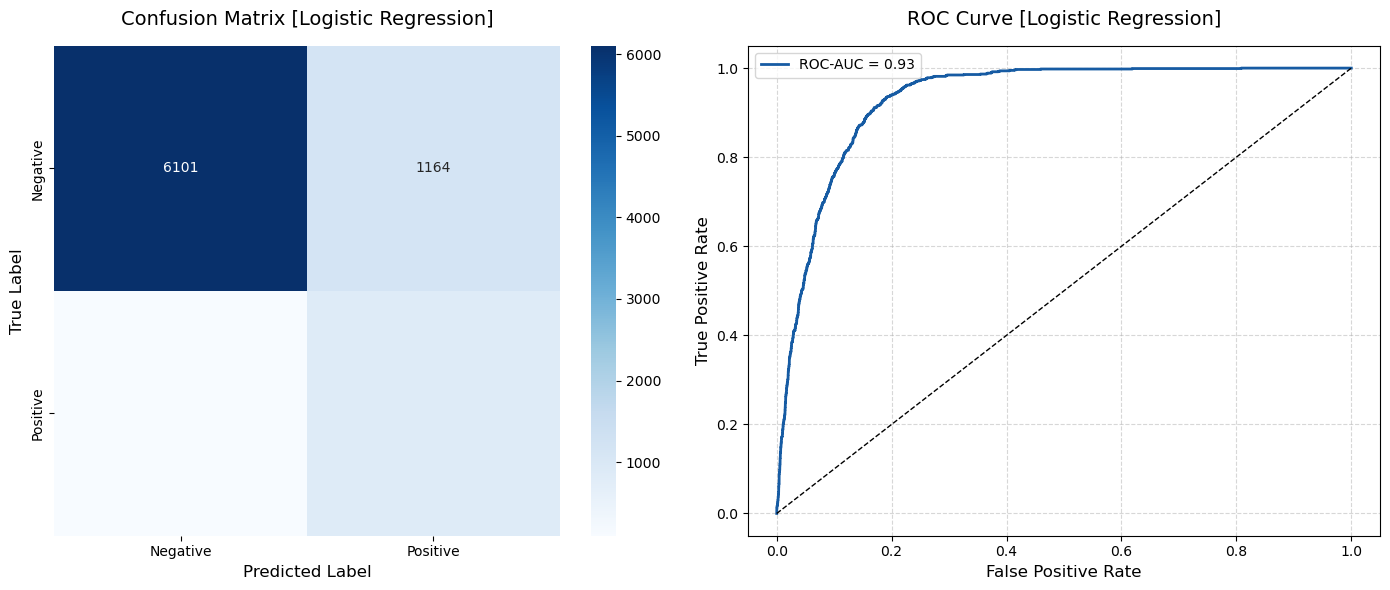

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  

# Confusion Matrix
cm_lr = confusion_matrix(y_test, test_preds_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'], ax=axs[0])

axs[0].set_xlabel('Predicted Label', fontsize=12)
axs[0].set_ylabel('True Label', fontsize=12)
axs[0].set_title('Confusion Matrix [Logistic Regression]', fontsize=14, pad=15)

# ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, test_probs_lr)
roc_auc_lr = roc_auc_score(y_test, test_probs_lr)

axs[1].plot(fpr_lr, tpr_lr, label=f'ROC-AUC = {roc_auc_lr:.2f}', color='#165ba3', linewidth=2)
axs[1].plot([0, 1], [0, 1], 'k--', linewidth=1)
axs[1].set_xlabel('False Positive Rate', fontsize=12)
axs[1].set_ylabel('True Positive Rate', fontsize=12)
axs[1].set_title('ROC Curve [Logistic Regression]', fontsize=14, pad=15)
axs[1].legend()
axs[1].grid(True, linestyle='--', alpha=0.5)

# Điều chỉnh layout
plt.tight_layout()
plt.show()


### **2. Naive Bayes**

In [33]:
pipeline_nb = Pipeline([
    ("preprocessing", preprocessing),
    ("ros", RandomOverSampler(random_state=42)),
    ("model", GaussianNB())
])

param_dist_nb = {
    'model__var_smoothing': st.loguniform(1e-12, 1e-7),
    'model__priors': [None, [0.5, 0.5], [0.4, 0.6], [0.6, 0.4]]

}

random_search_nb = RandomizedSearchCV(
    estimator=pipeline_nb,
    param_distributions=param_dist_nb,
    n_iter=20,                # số lần sampling
    scoring="balanced_accuracy",
    cv=5,                     # 5-fold cross-validation
    random_state=42,
    n_jobs=-1                 # sử dụng tất cả CPU để chạy nhanh hơn
)

random_search_nb.fit(X_train, y_train)

print("Best parameters for Naive Bayes:", random_search_nb.best_params_)
print("Best cross-validation balanced accuracy for Naive Bayes:", random_search_nb.best_score_)

Best parameters for Naive Bayes: {'model__priors': [0.4, 0.6], 'model__var_smoothing': 1.1462107403425044e-09}
Best cross-validation balanced accuracy for Naive Bayes: 0.7519424623195519


In [34]:
best_model_nb = random_search_nb.best_estimator_

test_preds_nb = best_model_nb.predict(X_test)
test_probs_nb = best_model_nb.predict_proba(X_test)[:, 1]  # Xác suất lớp 1

#Tính Balanced Accuracy
test_bal_acc_nb = balanced_accuracy_score(y_test, test_preds_nb)
print("\nTest Balanced Accuracy (Naive Bayes):", test_bal_acc_nb)

#confusion matrix và classification report
cm_nb = confusion_matrix(y_test, test_preds_nb)
print("\nConfusion Matrix (Naive Bayes):")
print(cm_nb)
print("\nClassification Report (Naive Bayes):")
print(classification_report(y_test, test_preds_nb))

tn, fp, fn, tp = cm_nb.ravel()
sensitivity_nb = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity_nb = tn / (tn + fp) if (tn + fp) > 0 else 0

#PR-AUC và ROC-AUC
pr_auc_nb = average_precision_score(y_test, test_probs_nb)
roc_auc_nb = roc_auc_score(y_test, test_probs_nb)

results_nb = {
    'Model': 'Naive Bayes',
    'Balanced Accuracy': test_bal_acc_nb,
    'Sensitivity': sensitivity_nb,
    'Specificity': specificity_nb,
    'PR-AUC': pr_auc_nb,
    'ROC-AUC': roc_auc_nb
}

results.append(results_nb)


Test Balanced Accuracy (Naive Bayes): 0.7592750678131045

Confusion Matrix (Naive Bayes):
[[5331 1934]
 [ 209  762]]

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.96      0.73      0.83      7265
           1       0.28      0.78      0.42       971

    accuracy                           0.74      8236
   macro avg       0.62      0.76      0.62      8236
weighted avg       0.88      0.74      0.78      8236



In [35]:
df_misclassified_nb = get_misclassified_cases(X_test, y_test, test_preds_nb, model_name="Naive Bayes")

df_uncertain_nb = get_uncertain_cases(
    X_test,
    y_test,
    test_preds_nb,
    test_probs_nb,
    model_name="Naive Bayes"
)



[Naive Bayes]
Số quan sát trong tập test: 8236
Số quan sát bị phân loại sai: 2143
Tỉ lệ sai: 26.02%

[Naive Bayes]
Tổng số mẫu trong tập test: 8236
Số mẫu không chắc chắn (0.45–0.55): 91
Số dự đoán đúng trong vùng không chắc chắn: 47
Số dự đoán sai trong vùng không chắc chắn: 44
Tỉ lệ dự đoán đúng trong vùng không chắc chắn: 51.65%


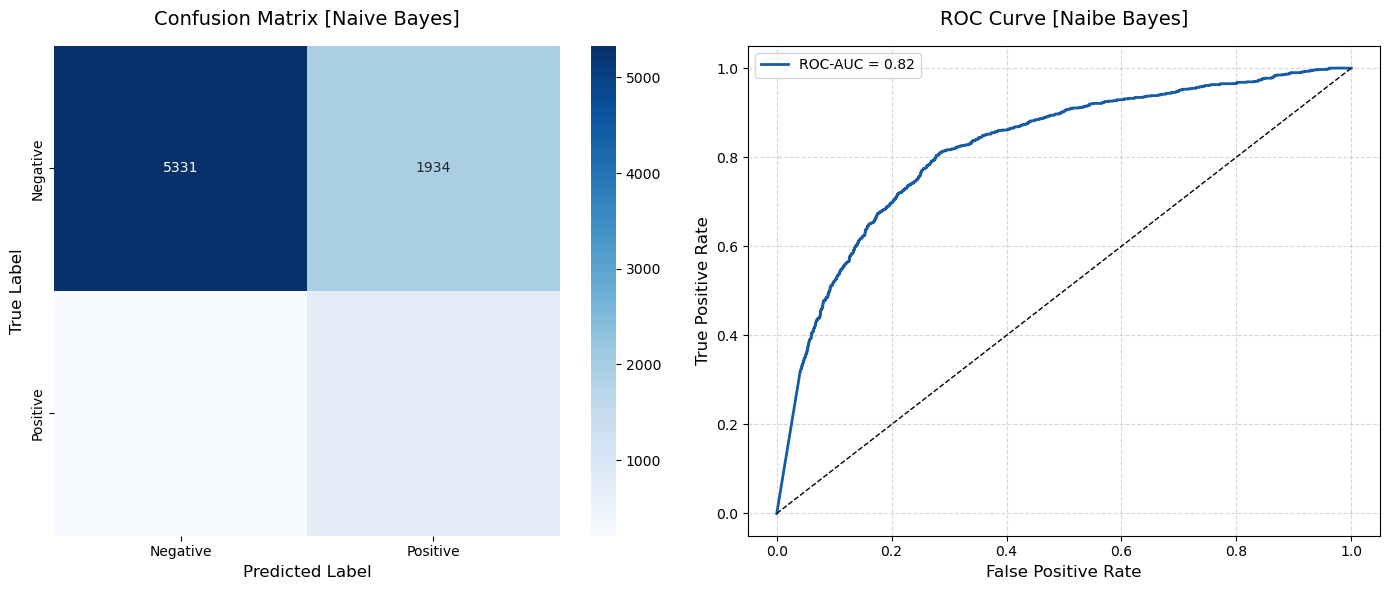

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  

# Confusion Matrix
cm_nb = confusion_matrix(y_test, test_preds_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'], ax=axs[0])

axs[0].set_xlabel('Predicted Label', fontsize=12)
axs[0].set_ylabel('True Label', fontsize=12)
axs[0].set_title('Confusion Matrix [Naive Bayes]', fontsize=14, pad=15)

# ROC Curve
fpr_nb, tpr_nb, _ = roc_curve(y_test, test_probs_nb)
roc_auc_nb = roc_auc_score(y_test, test_probs_nb)

axs[1].plot(fpr_nb, tpr_nb, label=f'ROC-AUC = {roc_auc_nb:.2f}', color='#165ba3', linewidth=2)
axs[1].plot([0, 1], [0, 1], 'k--', linewidth=1)
axs[1].set_xlabel('False Positive Rate', fontsize=12)
axs[1].set_ylabel('True Positive Rate', fontsize=12)
axs[1].set_title('ROC Curve [Naibe Bayes]', fontsize=14, pad=15)
axs[1].legend()
axs[1].grid(True, linestyle='--', alpha=0.5)

# Điều chỉnh layout
plt.tight_layout()
plt.show()

### **3. KNN**

In [37]:
pipeline_knn = Pipeline([
    ("preprocessing", preprocessing),
    ("ros", RandomOverSampler(random_state=42)),
    ("model", KNeighborsClassifier())
])

param_dist_knn = {
    'model__n_neighbors': [3, 5, 7, 9],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan']
}

random_search_knn = RandomizedSearchCV(
    estimator=pipeline_knn,
    param_distributions=param_dist_knn,
    n_iter=20,                # số lần sampling
    scoring="balanced_accuracy",
    cv=5,                     # 5-fold cross-validation
    random_state=42,
    n_jobs=-1                 # sử dụng tất cả CPU để chạy nhanh hơn
)

random_search_knn.fit(X_train, y_train)

print("Best parameters for KNN:", random_search_knn.best_params_)
print("Best cross-validation balanced accuracy for KNN:", random_search_knn.best_score_)

Best parameters for KNN: {'model__weights': 'uniform', 'model__n_neighbors': 9, 'model__metric': 'manhattan'}
Best cross-validation balanced accuracy for KNN: 0.7594015549579748


In [38]:
best_model_knn = random_search_knn.best_estimator_

#predict nhãn và xác suất
test_preds_knn = best_model_knn.predict(X_test)
test_probs_knn = best_model_knn.predict_proba(X_test)[:, 1]  # Xác suất lớp 1

#Balanced Accuracy
test_bal_acc_knn = balanced_accuracy_score(y_test, test_preds_knn)
print("\nTest Balanced Accuracy (K-Nearest Neighbors):", test_bal_acc_knn)

#confusion matrix và classification report
cm_knn = confusion_matrix(y_test, test_preds_knn)
print("\nConfusion Matrix (K-Nearest Neighbors):")
print(cm_knn)
print("\nClassification Report (K-Nearest Neighbors):")
print(classification_report(y_test, test_preds_knn))

tn, fp, fn, tp = cm_knn.ravel()
sensitivity_knn = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity_knn = tn / (tn + fp) if (tn + fp) > 0 else 0

#PR-AUC và ROC-AUC
pr_auc_knn = average_precision_score(y_test, test_probs_knn)
roc_auc_knn = roc_auc_score(y_test, test_probs_knn)

results_knn = {
    'Model': 'K-Nearest Neighbors',
    'Balanced Accuracy': test_bal_acc_knn,
    'Sensitivity': sensitivity_knn,
    'Specificity': specificity_knn,
    'PR-AUC': pr_auc_knn,
    'ROC-AUC': roc_auc_knn
}

results.append(results_knn)


Test Balanced Accuracy (K-Nearest Neighbors): 0.7582458396031365

Confusion Matrix (K-Nearest Neighbors):
[[5750 1515]
 [ 267  704]]

Classification Report (K-Nearest Neighbors):
              precision    recall  f1-score   support

           0       0.96      0.79      0.87      7265
           1       0.32      0.73      0.44       971

    accuracy                           0.78      8236
   macro avg       0.64      0.76      0.65      8236
weighted avg       0.88      0.78      0.82      8236



In [39]:
df_misclassified_knn = get_misclassified_cases(X_test, y_test, test_preds_knn, model_name="K-Nearest Neighbors")

df_uncertain_knn = get_uncertain_cases(
    X_test,
    y_test,
    test_preds_knn,
    test_probs_knn,
    model_name="K-Nearest Neighbors"
)


[K-Nearest Neighbors]
Số quan sát trong tập test: 8236
Số quan sát bị phân loại sai: 1782
Tỉ lệ sai: 21.64%

[K-Nearest Neighbors]
Tổng số mẫu trong tập test: 8236
Số mẫu không chắc chắn (0.45–0.55): 0
Không có mẫu nào nằm trong vùng không chắc chắn.


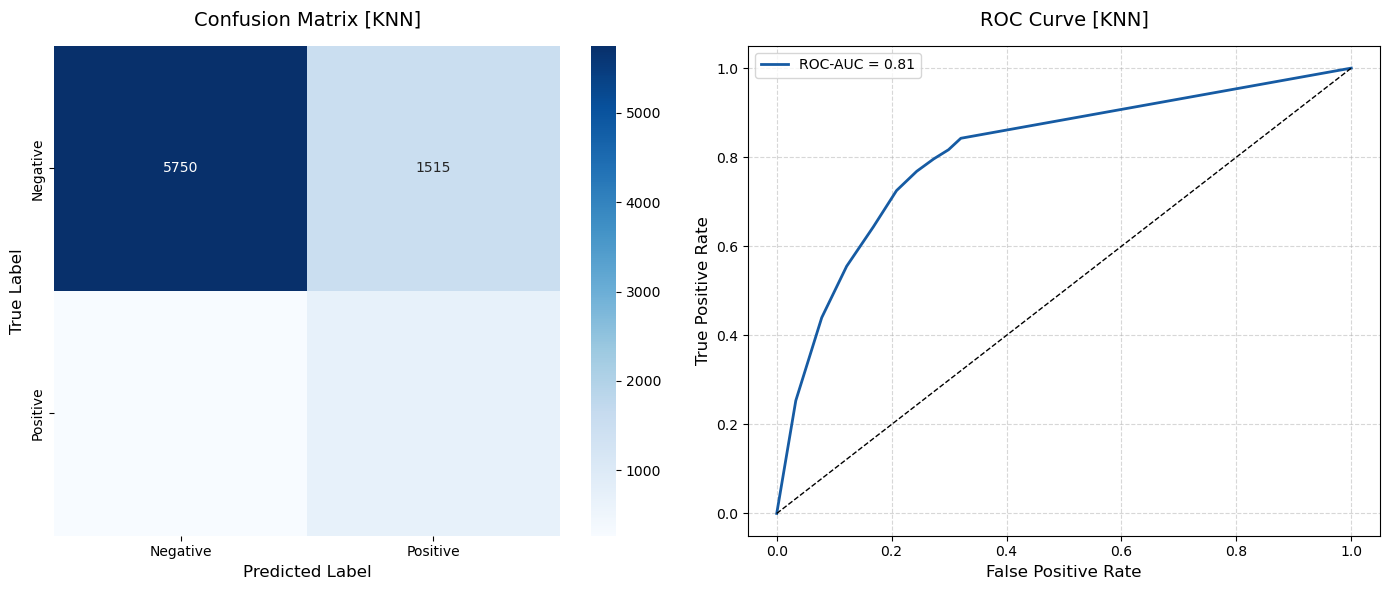

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  

# Confusion Matrix
cm_knn = confusion_matrix(y_test, test_preds_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'], ax=axs[0])

axs[0].set_xlabel('Predicted Label', fontsize=12)
axs[0].set_ylabel('True Label', fontsize=12)
axs[0].set_title('Confusion Matrix [KNN]', fontsize=14, pad=15)

# ROC Curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, test_probs_knn)
roc_auc_knn = roc_auc_score(y_test, test_probs_knn)

axs[1].plot(fpr_knn, tpr_knn, label=f'ROC-AUC = {roc_auc_knn:.2f}', color='#165ba3', linewidth=2)
axs[1].plot([0, 1], [0, 1], 'k--', linewidth=1)
axs[1].set_xlabel('False Positive Rate', fontsize=12)
axs[1].set_ylabel('True Positive Rate', fontsize=12)
axs[1].set_title('ROC Curve [KNN]', fontsize=14, pad=15)
axs[1].legend()
axs[1].grid(True, linestyle='--', alpha=0.5)

# Điều chỉnh layout
plt.tight_layout()
plt.show()

### **4. Random forest**

In [41]:
pipeline_rf = Pipeline([
    ("preprocessing", preprocessing),
    ("ros", RandomOverSampler(random_state=42)),
    ("model", RandomForestClassifier(random_state=42))
])

param_dist_rf = {
    'model__n_estimators': [100],
    'model__max_depth': [10, 20, 30, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', 'log2'],
    'model__bootstrap': [True, False]
}

random_search_rf = RandomizedSearchCV(
    estimator=pipeline_rf,
    param_distributions=param_dist_rf,
    n_iter=20,                # số lần sampling
    scoring="balanced_accuracy",
    cv=5,                     # 5-fold cross-validation
    random_state=42,
    n_jobs=-1                 # sử dụng tất cả CPU để chạy nhanh hơn
)

random_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", random_search_rf.best_params_)
print("Best cross-validation balanced accuracy for Random Forest:", random_search_rf.best_score_)

Best parameters for Random Forest: {'model__n_estimators': 100, 'model__min_samples_split': 2, 'model__min_samples_leaf': 4, 'model__max_features': 'sqrt', 'model__max_depth': 10, 'model__bootstrap': False}
Best cross-validation balanced accuracy for Random Forest: 0.8814993103347086


In [42]:
best_model_rf = random_search_rf.best_estimator_

#predict nhãn và xác suất
test_preds_rf = best_model_rf.predict(X_test)
test_probs_rf = best_model_rf.predict_proba(X_test)[:, 1]  # Xác suất lớp 1

#Balanced Accuracy
test_bal_acc_rf = balanced_accuracy_score(y_test, test_preds_rf)
print("\nTest Balanced Accuracy (Random Forest):", test_bal_acc_rf)

#confusion matrix và classification report
cm_rf = confusion_matrix(y_test, test_preds_rf)
print("\nConfusion Matrix (Random Forest):")
print(cm_rf)
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, test_preds_rf))

tn, fp, fn, tp = cm_rf.ravel()
sensitivity_rf = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity_rf = tn / (tn + fp) if (tn + fp) > 0 else 0

#PR-AUC và ROC-AUC
pr_auc_rf = average_precision_score(y_test, test_probs_rf)
roc_auc_rf = roc_auc_score(y_test, test_probs_rf)

results_rf = {
    'Model': 'Random Forest',
    'Balanced Accuracy': test_bal_acc_rf,
    'Sensitivity': sensitivity_rf,
    'Specificity': specificity_rf,
    'PR-AUC': pr_auc_rf,
    'ROC-AUC': roc_auc_rf
}

results.append(results_rf)


Test Balanced Accuracy (Random Forest): 0.8800385296091824

Confusion Matrix (Random Forest):
[[6128 1137]
 [  81  890]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      7265
           1       0.44      0.92      0.59       971

    accuracy                           0.85      8236
   macro avg       0.71      0.88      0.75      8236
weighted avg       0.92      0.85      0.87      8236



In [43]:
df_misclassified_rf = get_misclassified_cases(X_test, y_test, test_preds_rf, model_name="Random Forest")

df_uncertain_rf = get_uncertain_cases(
    X_test,
    y_test,
    test_preds_rf,
    test_probs_rf,
    model_name="Random Forest"
)


[Random Forest]
Số quan sát trong tập test: 8236
Số quan sát bị phân loại sai: 1218
Tỉ lệ sai: 14.79%

[Random Forest]
Tổng số mẫu trong tập test: 8236
Số mẫu không chắc chắn (0.45–0.55): 377
Số dự đoán đúng trong vùng không chắc chắn: 189
Số dự đoán sai trong vùng không chắc chắn: 188
Tỉ lệ dự đoán đúng trong vùng không chắc chắn: 50.13%


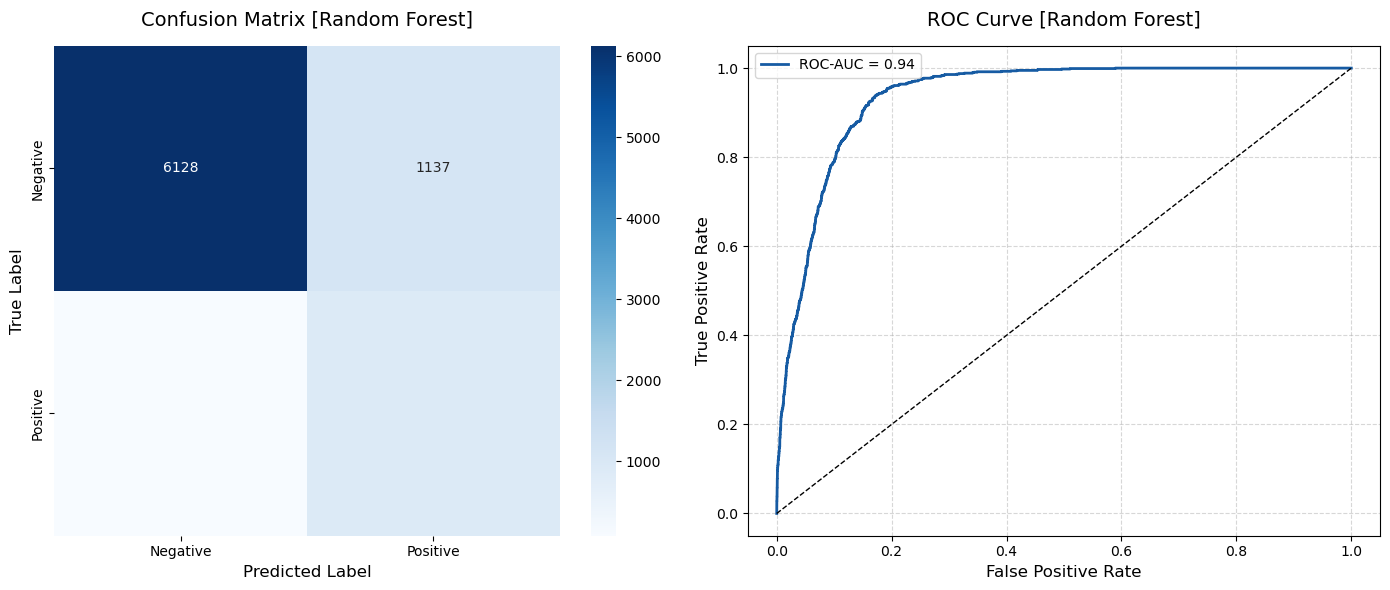

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  

# Confusion Matrix
cm_rf = confusion_matrix(y_test, test_preds_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'], ax=axs[0])

axs[0].set_xlabel('Predicted Label', fontsize=12)
axs[0].set_ylabel('True Label', fontsize=12)
axs[0].set_title('Confusion Matrix [Random Forest]', fontsize=14, pad=15)

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, test_probs_rf)
roc_auc_rf = roc_auc_score(y_test, test_probs_rf)

axs[1].plot(fpr_rf, tpr_rf, label=f'ROC-AUC = {roc_auc_rf:.2f}', color='#165ba3', linewidth=2)
axs[1].plot([0, 1], [0, 1], 'k--', linewidth=1)
axs[1].set_xlabel('False Positive Rate', fontsize=12)
axs[1].set_ylabel('True Positive Rate', fontsize=12)
axs[1].set_title('ROC Curve [Random Forest]', fontsize=14, pad=15)
axs[1].legend()
axs[1].grid(True, linestyle='--', alpha=0.5)

# Điều chỉnh layout
plt.tight_layout()
plt.show()

In [45]:
model_rf = best_model_rf.named_steps['model']
model_rf

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=4,
                       random_state=42)

In [46]:
# Lấy tên cột numerical (vì scaler và outlier không thay đổi số lượng cột)
numerical_feature_names = numerical_columns

# Lấy tên cột categorical sau one-hot
cat_feature_names = preprocessing.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(categorical_columns)

# Gộp lại
feature_names_after_preprocessing = np.concatenate([numerical_feature_names, cat_feature_names])

print(len(feature_names_after_preprocessing))   


63


In [47]:
# Get feature importance from the Gradient Boosting model
importances_rf = best_model_rf.named_steps['model'].feature_importances_

# Create a DataFrame for feature importance
feature_importance_df_rf = pd.DataFrame({
    'Feature': feature_names_after_preprocessing,
    'Importance': importances_rf
})

# Sort the DataFrame by importance
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False).reset_index(drop=True)
feature_importance_df_rf


Feature  Importance
0               duration    0.409868
1              euribor3m    0.118220
2            nr.employed    0.106541
3           emp.var.rate    0.089665
4         cons.price.idx    0.042454
..                   ...         ...
58       marital_unknown    0.000067
59  education_illiterate    0.000054
60                 pdays    0.000000
61           default_yes    0.000000
62              previous    0.000000

[63 rows x 2 columns]

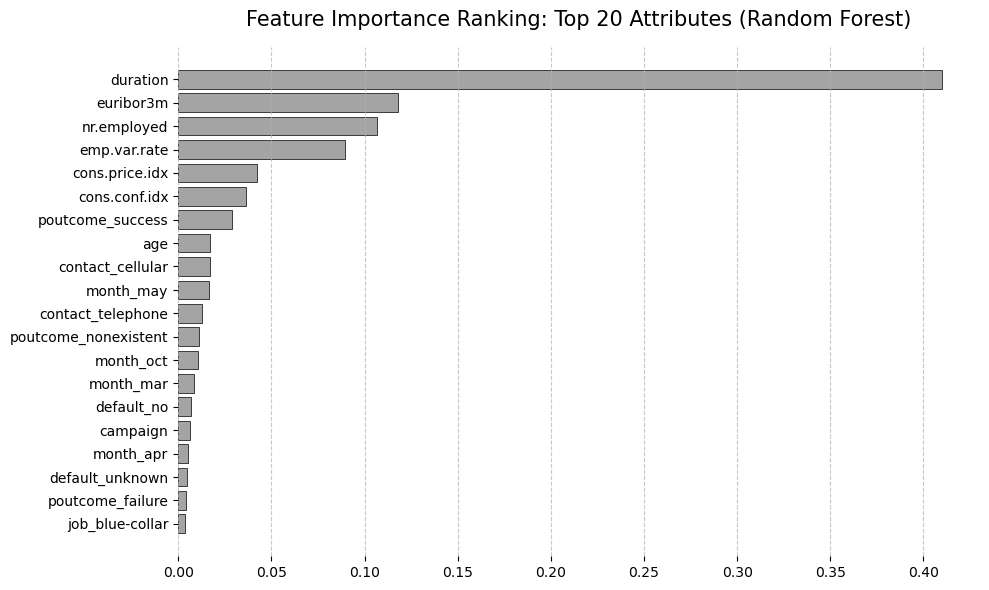

In [48]:
top_n = 20

plt.figure(figsize=(10, 6))
plt.barh(
    feature_importance_df_rf['Feature'].iloc[:top_n],
    feature_importance_df_rf['Importance'].iloc[:top_n],
    color='#a4a4a4',
    edgecolor='black',
    linewidth=0.5  
)

sns.despine(left=True, bottom=True)   # bỏ viền trái và dưới

plt.title('Feature Importance Ranking: Top 20 Attributes (Random Forest)', fontsize=15, color='black', pad=15)
plt.gca().invert_yaxis()
plt.grid(axis='y', visible=False)    
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [49]:
# import shap

# #chuẩn hóa dữ liệu test để đưa vào SHAP (chỉ áp dụng preprocessing, không oversampling)
# X_test_proc_rf = best_model_rf.named_steps['preprocessing'].transform(X_test)

# #khởi tạo SHAP explainer cho CatBoost
# explainer_rf = shap.TreeExplainer(model_rf)

# #tính toán giá trị SHAP cho tập test
# shap_values = explainer_rf.shap_values(X_test_proc)

# #lấy danh sách feature sau khi transform
# ohe_feature_names = best_model_rf.named_steps['preprocessing'].named_transformers_['cat']['encoder'].get_feature_names_out(categorical_columns)
# num_feature_names = numerical_columns
# all_feature_names = list(num_feature_names) + list(ohe_feature_names)

# shap.summary_plot(shap_values, X_test_proc_rf, feature_names=all_feature_names)
# shap.plots.waterfall(shap_values[0])

### **5. Gradient Boosting**

In [50]:
pipeline_gb = Pipeline([
    ("preprocessing", preprocessing),
    ("ros", RandomOverSampler(random_state=42)),
    ("model", GradientBoostingClassifier())
])

param_dist_gb = {
    'model__n_estimators': [100],
    'model__learning_rate': [0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [1.0],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 3, 5]
}

random_search_gb = RandomizedSearchCV(
    estimator=pipeline_gb,
    param_distributions=param_dist_gb,
    n_iter=30,               
    scoring="balanced_accuracy",
    cv=5,                    
    random_state=42,
    n_jobs=-1
)

random_search_gb.fit(X_train, y_train)

print("Best parameters for Gradient Boosting:", random_search_gb.best_params_)
print("Best cross-validation balanced accuracy for Gradient Boosting:", random_search_gb.best_score_)

Best parameters for Gradient Boosting: {'model__subsample': 1.0, 'model__n_estimators': 100, 'model__min_samples_split': 2, 'model__min_samples_leaf': 3, 'model__max_depth': 3, 'model__learning_rate': 0.2}
Best cross-validation balanced accuracy for Gradient Boosting: 0.8912047406200372


In [51]:
best_model_gb = random_search_gb.best_estimator_

#predict nhãn và xác suất
test_preds_gb = best_model_gb.predict(X_test)
test_probs_gb = best_model_gb.predict_proba(X_test)[:, 1]  # Xác suất lớp 1

#Balanced Accuracy
test_bal_acc_gb = balanced_accuracy_score(y_test, test_preds_gb)
print("\nTest Balanced Accuracy (Gradient Boosting):", test_bal_acc_gb)

#confusion matrix và classification report
cm_gb = confusion_matrix(y_test, test_preds_gb)
print("\nConfusion Matrix (Gradient Boosting):")
print(cm_gb)
print("\nClassification Report (Gradient Boosting):")
print(classification_report(y_test, test_preds_gb))

tn, fp, fn, tp = cm_gb.ravel()
sensitivity_gb = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity_gb = tn / (tn + fp) if (tn + fp) > 0 else 0

#PR-AUC và ROC-AUC
pr_auc_gb = average_precision_score(y_test, test_probs_gb)
roc_auc_gb = roc_auc_score(y_test, test_probs_gb)

results_gb = {
    'Model': 'Gradient Boosting',
    'Balanced Accuracy': test_bal_acc_gb,
    'Sensitivity': sensitivity_gb,
    'Specificity': specificity_gb,
    'PR-AUC': pr_auc_gb,
    'ROC-AUC': roc_auc_gb
}

results.append(results_gb)


Test Balanced Accuracy (Gradient Boosting): 0.8872268250000177

Confusion Matrix (Gradient Boosting):
[[6210 1055]
 [  78  893]]

Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.99      0.85      0.92      7265
           1       0.46      0.92      0.61       971

    accuracy                           0.86      8236
   macro avg       0.72      0.89      0.76      8236
weighted avg       0.93      0.86      0.88      8236



In [52]:
df_misclassified_gb = get_misclassified_cases(X_test, y_test, test_preds_gb, model_name="Gradient Boosting")

df_uncertain_gb = get_uncertain_cases(
    X_test,
    y_test,
    test_preds_gb,
    test_probs_gb,
    model_name="Gradient Boosting"
)


[Gradient Boosting]
Số quan sát trong tập test: 8236
Số quan sát bị phân loại sai: 1133
Tỉ lệ sai: 13.76%

[Gradient Boosting]
Tổng số mẫu trong tập test: 8236
Số mẫu không chắc chắn (0.45–0.55): 192
Số dự đoán đúng trong vùng không chắc chắn: 106
Số dự đoán sai trong vùng không chắc chắn: 86
Tỉ lệ dự đoán đúng trong vùng không chắc chắn: 55.21%


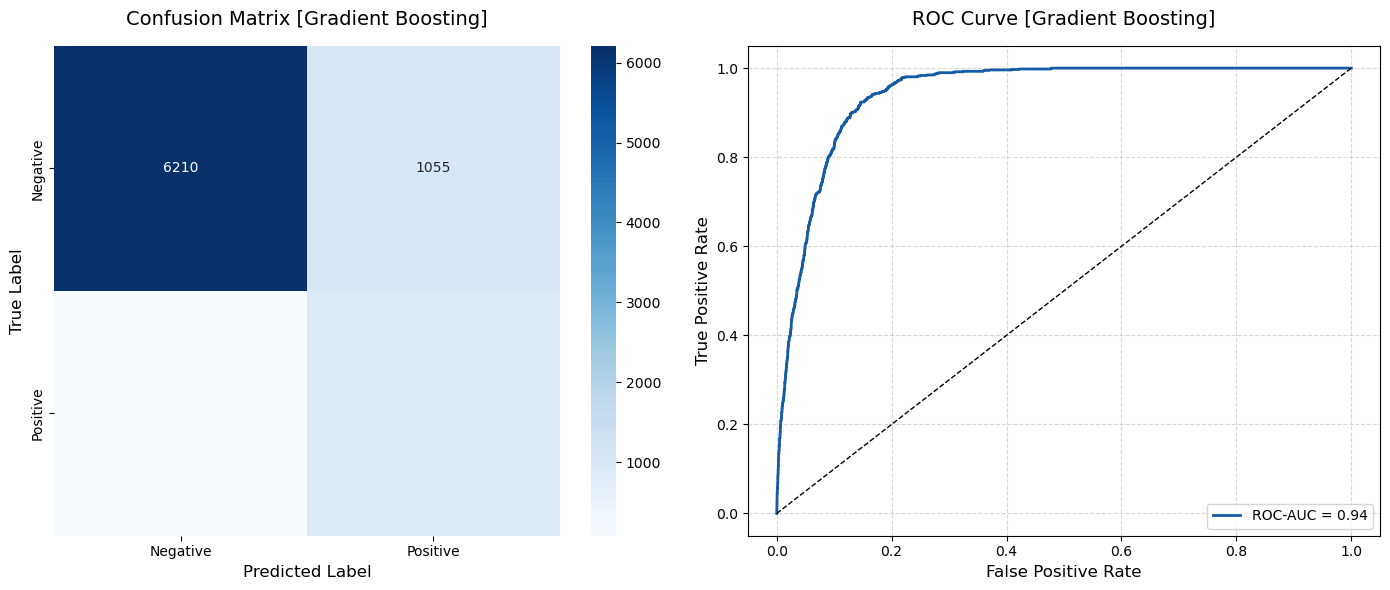

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  

# Confusion Matrix
cm_gb = confusion_matrix(y_test, test_preds_gb)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'], ax=axs[0])

axs[0].set_xlabel('Predicted Label', fontsize=12)
axs[0].set_ylabel('True Label', fontsize=12)
axs[0].set_title('Confusion Matrix [Gradient Boosting]', fontsize=14, pad=15)

# ROC Curve
fpr_gb, tpr_gb, _ = roc_curve(y_test, test_probs_gb)
roc_auc_gb = roc_auc_score(y_test, test_probs_gb)

axs[1].plot(fpr_gb, tpr_gb, label=f'ROC-AUC = {roc_auc_gb:.2f}', color='#165ba3', linewidth=2)
axs[1].plot([0, 1], [0, 1], 'k--', linewidth=1)
axs[1].set_xlabel('False Positive Rate', fontsize=12)
axs[1].set_ylabel('True Positive Rate', fontsize=12)
axs[1].set_title('ROC Curve [Gradient Boosting]', fontsize=14, pad=15)
axs[1].legend()
axs[1].grid(True, linestyle='--', alpha=0.5)

# Điều chỉnh layout
plt.tight_layout()
plt.show()

In [54]:
model_gb = best_model_gb.named_steps['model']
model_gb

GradientBoostingClassifier(learning_rate=0.2, min_samples_leaf=3)

In [55]:
# Get feature importance from the Gradient Boosting model
importances_gb = best_model_gb.named_steps['model'].feature_importances_

# Create a DataFrame for feature importance
feature_importance_df_gb = pd.DataFrame({
    'Feature': feature_names_after_preprocessing,
    'Importance': importances_gb
})

# Sort the DataFrame by importance
feature_importance_df_gb = feature_importance_df_gb.sort_values(by='Importance', ascending=False).reset_index(drop=True)
feature_importance_df_gb

Feature  Importance
0          duration    0.515382
1       nr.employed    0.230937
2         euribor3m    0.087626
3     cons.conf.idx    0.052658
4      emp.var.rate    0.050066
..              ...         ...
58  marital_unknown    0.000000
59         loan_yes    0.000000
60          loan_no    0.000000
61      housing_yes    0.000000
62      default_yes    0.000000

[63 rows x 2 columns]

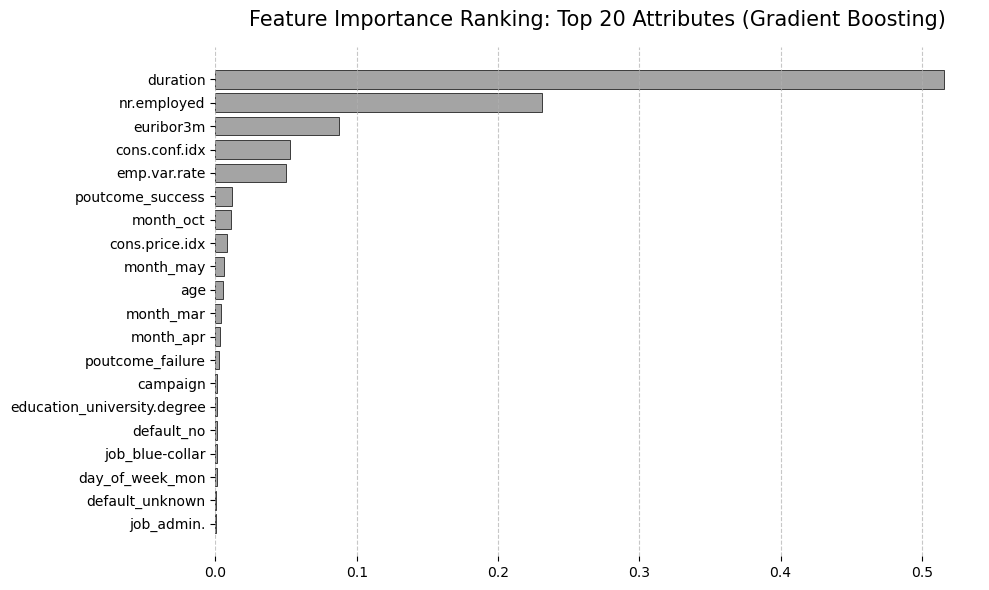

In [56]:
top_n = 20

plt.figure(figsize=(10, 6))
plt.barh(
    feature_importance_df_gb['Feature'].iloc[:top_n],
    feature_importance_df_gb['Importance'].iloc[:top_n],
    color='#a4a4a4',
    edgecolor='black',
    linewidth=0.5  
)

sns.despine(left=True, bottom=True)   # bỏ viền trái và dưới

plt.title('Feature Importance Ranking: Top 20 Attributes (Gradient Boosting)', fontsize=15, color='black', pad=15)
plt.gca().invert_yaxis()
plt.grid(axis='y', visible=False)    
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

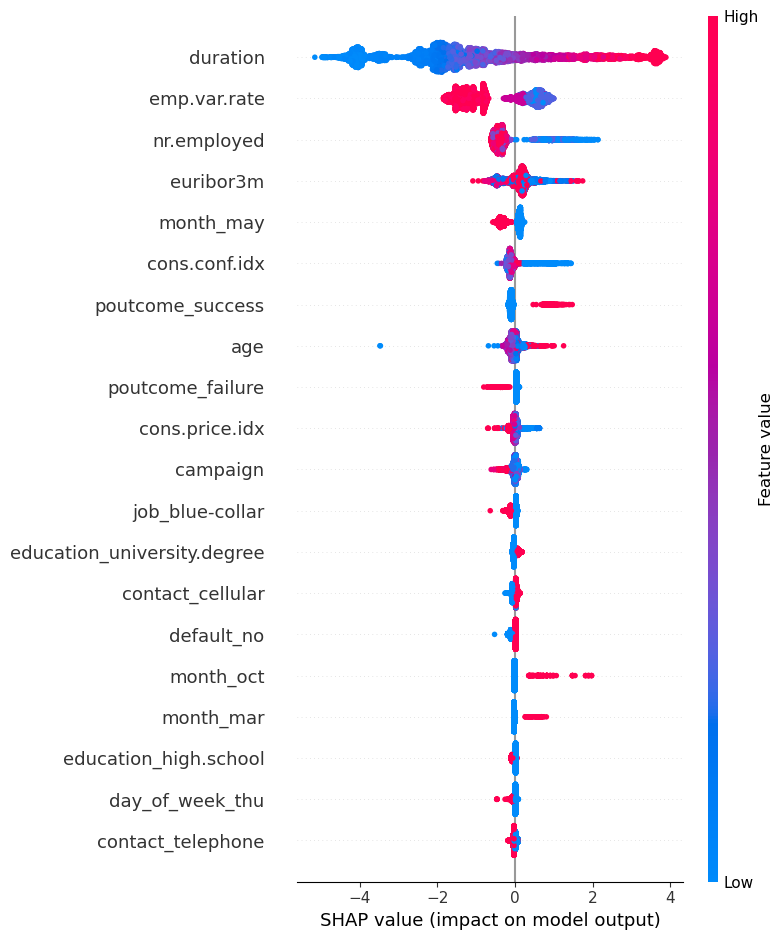

TypeError: The waterfall plot requires an `Explanation` object as the `shap_values` argument.

In [57]:
import shap

# Step 2: Chuẩn hóa dữ liệu test để đưa vào SHAP (chỉ áp dụng preprocessing, không oversampling)
X_test_proc_gb = best_model_gb.named_steps['preprocessing'].transform(X_test)

# Step 3: Khởi tạo SHAP explainer cho CatBoost
explainer_gb = shap.TreeExplainer(model_gb)

# Step 4: Tính toán giá trị SHAP cho tập test
shap_values = explainer_gb.shap_values(X_test_proc)

# Lấy danh sách feature sau khi transform
ohe_feature_names = best_model_gb.named_steps['preprocessing'].named_transformers_['cat']['encoder'].get_feature_names_out(categorical_columns)
num_feature_names = numerical_columns
all_feature_names = list(num_feature_names) + list(ohe_feature_names)

# Vẽ lại biểu đồ SHAP
shap.summary_plot(shap_values, X_test_proc_gb, feature_names=all_feature_names)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

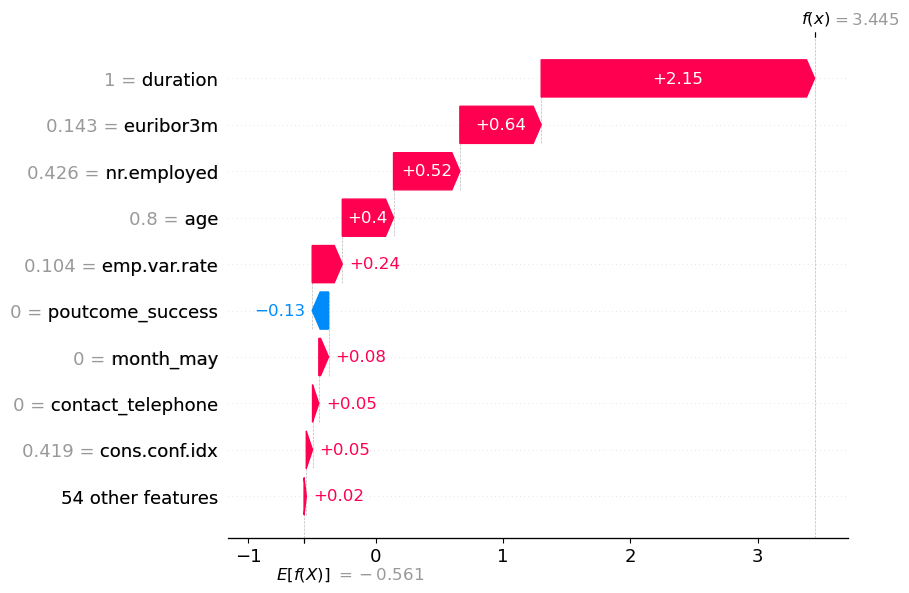

In [58]:
# Tính shap.Explanation object thay vì mảng
X_test_proc_df_gb = pd.DataFrame(X_test_proc_gb, columns=all_feature_names)

shap_values_exp_gb = explainer_gb(X_test_proc_df_gb, check_additivity=False)  # cần để dùng waterfall plot
shap.plots.waterfall(shap_values_exp_gb[0], max_display=10)

### **6. LightGBM**

In [59]:
pipeline_lgb = Pipeline([
    ("preprocessing", preprocessing),
    ("ros", RandomOverSampler(random_state=42)),
    ("model", LGBMClassifier(verbose=-1))
])

param_dist_lgb = {
    'model__n_estimators': [100],
    'model__learning_rate': [0.1, 0.2],
    'model__max_depth': [-1],           
    'model__num_leaves': [15, 31],      
    'model__min_child_samples': [5, 10, 20],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__reg_alpha': [0.0, 0.5, 1.0],         
    'model__reg_lambda': [0.0, 0.5, 1.0]         
}

random_search_lgb = RandomizedSearchCV(
    estimator=pipeline_lgb,
    param_distributions=param_dist_lgb,
    n_iter=30,                      
    scoring="balanced_accuracy",
    cv=5,                           
    random_state=42,
    n_jobs=-1
)

random_search_lgb.fit(X_train, y_train)

print("Best parameters for LightGBM:", random_search_lgb.best_params_)
print("Best cross-validation balanced accuracy for LightGBM:", random_search_lgb.best_score_)

/Users/fuenganh/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/fuenganh/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/fuenganh/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/fuenganh/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/fuenganh/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in

Best parameters for LightGBM: {'model__subsample': 0.8, 'model__reg_lambda': 0.5, 'model__reg_alpha': 1.0, 'model__num_leaves': 15, 'model__n_estimators': 100, 'model__min_child_samples': 10, 'model__max_depth': -1, 'model__learning_rate': 0.1, 'model__colsample_bytree': 0.6}
Best cross-validation balanced accuracy for LightGBM: 0.8945911734273132


In [60]:
from sklearn.metrics import average_precision_score, roc_auc_score

# === Lấy mô hình tốt nhất từ RandomizedSearchCV (LightGBM)
best_model_lgb = random_search_lgb.best_estimator_

# === Dự đoán nhãn và xác suất
test_preds_lgb = best_model_lgb.predict(X_test)
test_probs_lgb = best_model_lgb.predict_proba(X_test)[:, 1]  # Xác suất lớp 1

# === Tính Balanced Accuracy
test_bal_acc_lgb = balanced_accuracy_score(y_test, test_preds_lgb)
print("\nTest Balanced Accuracy (LightGBM):", test_bal_acc_lgb)

# === Tính confusion matrix và classification report
cm_lgb = confusion_matrix(y_test, test_preds_lgb)
print("\nConfusion Matrix (LightGBM):")
print(cm_lgb)
print("\nClassification Report (LightGBM):")
print(classification_report(y_test, test_preds_lgb))

# === Giải nén confusion matrix
tn, fp, fn, tp = cm_lgb.ravel()
sensitivity_lgb = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity_lgb = tn / (tn + fp) if (tn + fp) > 0 else 0

# === Tính thêm PR-AUC và ROC-AUC
pr_auc_lgb = average_precision_score(y_test, test_probs_lgb)
roc_auc_lgb = roc_auc_score(y_test, test_probs_lgb)

# === Lưu kết quả vào dictionary
results_lgb = {
    'Model': 'LightGBM',
    'Balanced Accuracy': test_bal_acc_lgb,
    'Sensitivity': sensitivity_lgb,
    'Specificity': specificity_lgb,
    'PR-AUC': pr_auc_lgb,
    'ROC-AUC': roc_auc_lgb
}

results.append(results_lgb)


Test Balanced Accuracy (LightGBM): 0.8870485653107354

Confusion Matrix (LightGBM):
[[6170 1095]
 [  73  898]]

Classification Report (LightGBM):
              precision    recall  f1-score   support

           0       0.99      0.85      0.91      7265
           1       0.45      0.92      0.61       971

    accuracy                           0.86      8236
   macro avg       0.72      0.89      0.76      8236
weighted avg       0.92      0.86      0.88      8236



In [61]:
df_misclassified_lgb = get_misclassified_cases(X_test, y_test, test_preds_lgb, model_name="LightGBM")

df_uncertain_lgb = get_uncertain_cases(
    X_test,
    y_test,
    test_preds_lgb,
    test_probs_lgb,
    model_name="LightGBM"
)


[LightGBM]
Số quan sát trong tập test: 8236
Số quan sát bị phân loại sai: 1168
Tỉ lệ sai: 14.18%

[LightGBM]
Tổng số mẫu trong tập test: 8236
Số mẫu không chắc chắn (0.45–0.55): 205
Số dự đoán đúng trong vùng không chắc chắn: 99
Số dự đoán sai trong vùng không chắc chắn: 106
Tỉ lệ dự đoán đúng trong vùng không chắc chắn: 48.29%


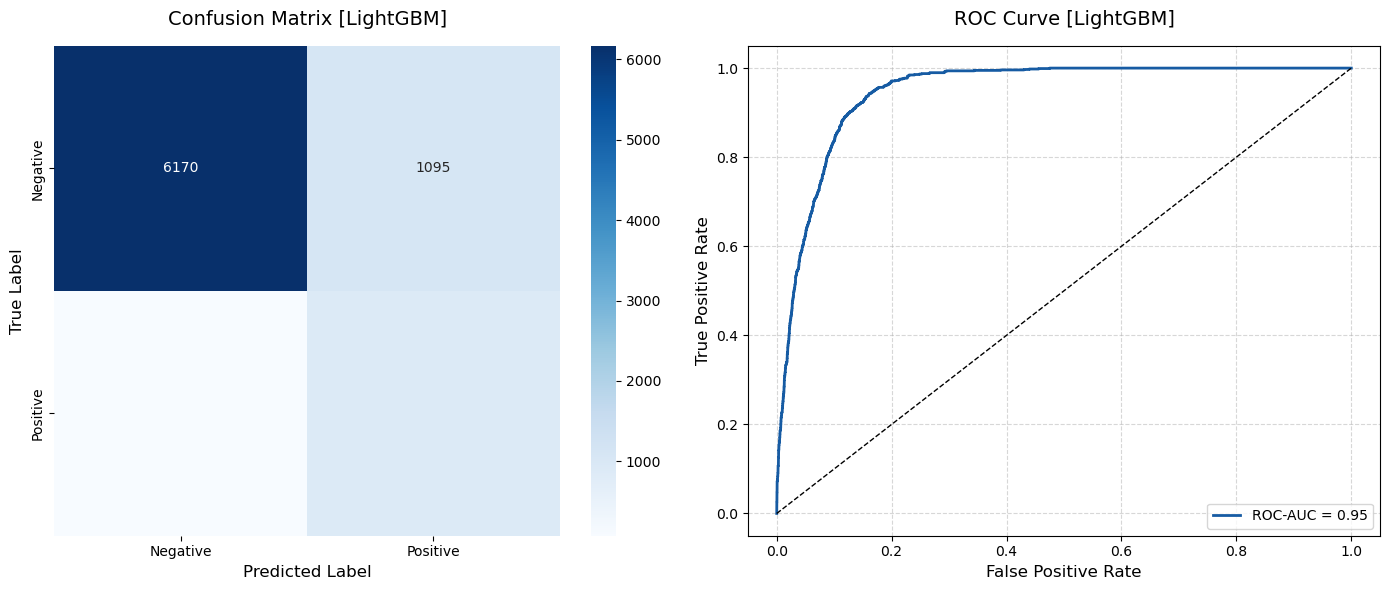

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  

# Confusion Matrix
cm_lgb = confusion_matrix(y_test, test_preds_lgb)
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'], ax=axs[0])

axs[0].set_xlabel('Predicted Label', fontsize=12)
axs[0].set_ylabel('True Label', fontsize=12)
axs[0].set_title('Confusion Matrix [LightGBM]', fontsize=14, pad=15)

# ROC Curve
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, test_probs_lgb)
roc_auc_lgb = roc_auc_score(y_test, test_probs_lgb)

axs[1].plot(fpr_lgb, tpr_lgb, label=f'ROC-AUC = {roc_auc_lgb:.2f}', color='#165ba3', linewidth=2)
axs[1].plot([0, 1], [0, 1], 'k--', linewidth=1)
axs[1].set_xlabel('False Positive Rate', fontsize=12)
axs[1].set_ylabel('True Positive Rate', fontsize=12)
axs[1].set_title('ROC Curve [LightGBM]', fontsize=14, pad=15)
axs[1].legend()
axs[1].grid(True, linestyle='--', alpha=0.5)

# Điều chỉnh layout
plt.tight_layout()
plt.show()

In [63]:
model_lgb = best_model_lgb.named_steps['model']
model_lgb

LGBMClassifier(colsample_bytree=0.6, min_child_samples=10, num_leaves=15,
               reg_alpha=1.0, reg_lambda=0.5, subsample=0.8, verbose=-1)

In [64]:
# Get feature importance from the Gradient Boosting model
importances_lgb = best_model_lgb.named_steps['model'].feature_importances_

# Create a DataFrame for feature importance
feature_importance_df_lgb = pd.DataFrame({
    'Feature': feature_names_after_preprocessing,
    'Importance': importances_lgb
})

# Sort the DataFrame by importance
feature_importance_df_lgb = feature_importance_df_lgb.sort_values(by='Importance', ascending=False).reset_index(drop=True)
feature_importance_df_lgb

Feature  Importance
0            duration         294
1           euribor3m         272
2                 age          96
3        emp.var.rate          87
4       cons.conf.idx          85
..                ...         ...
58  education_unknown           0
59              pdays           0
60    marital_unknown           0
61        job_unknown           0
62        default_yes           0

[63 rows x 2 columns]

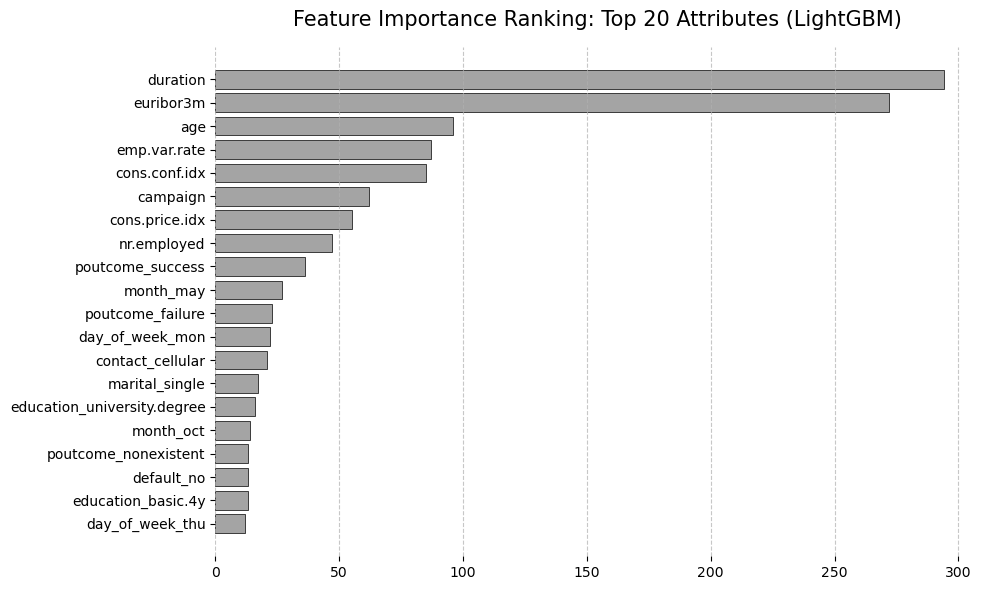

In [65]:
top_n = 20

plt.figure(figsize=(10, 6))
plt.barh(
    feature_importance_df_lgb['Feature'].iloc[:top_n],
    feature_importance_df_lgb['Importance'].iloc[:top_n],
    color='#a4a4a4',
    edgecolor='black',
    linewidth=0.5  
)

sns.despine(left=True, bottom=True)   # bỏ viền trái và dưới

plt.title('Feature Importance Ranking: Top 20 Attributes (LightGBM)', fontsize=15, color='black', pad=15)
plt.gca().invert_yaxis()
plt.grid(axis='y', visible=False)    
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

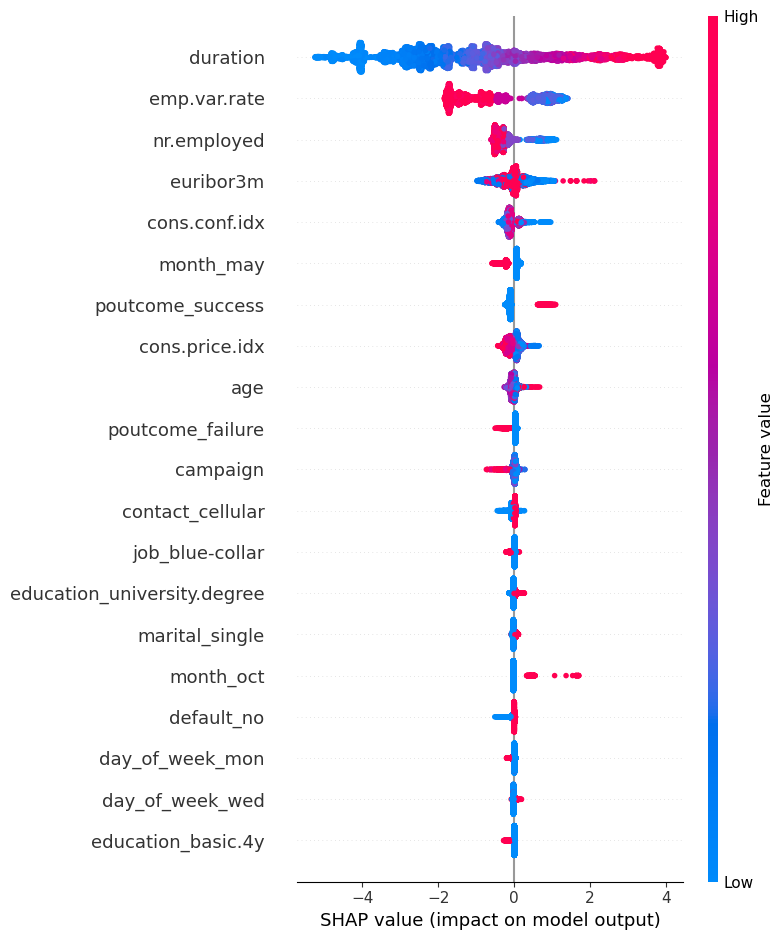

TypeError: The waterfall plot requires an `Explanation` object as the `shap_values` argument.

In [66]:
import shap
# Step 2: Chuẩn hóa dữ liệu test để đưa vào SHAP (chỉ áp dụng preprocessing, không oversampling)
X_test_proc_lgb = best_model_lgb.named_steps['preprocessing'].transform(X_test)

# Step 3: Khởi tạo SHAP explainer cho CatBoost
explainer_lgb = shap.TreeExplainer(model_lgb)

# Step 4: Tính toán giá trị SHAP cho tập test
shap_values = explainer_lgb.shap_values(X_test_proc)

# Lấy danh sách feature sau khi transform
ohe_feature_names = best_model_lgb.named_steps['preprocessing'].named_transformers_['cat']['encoder'].get_feature_names_out(categorical_columns)
num_feature_names = numerical_columns
all_feature_names = list(num_feature_names) + list(ohe_feature_names)

# Vẽ lại biểu đồ SHAP
shap.summary_plot(shap_values, X_test_proc_lgb, feature_names=all_feature_names)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

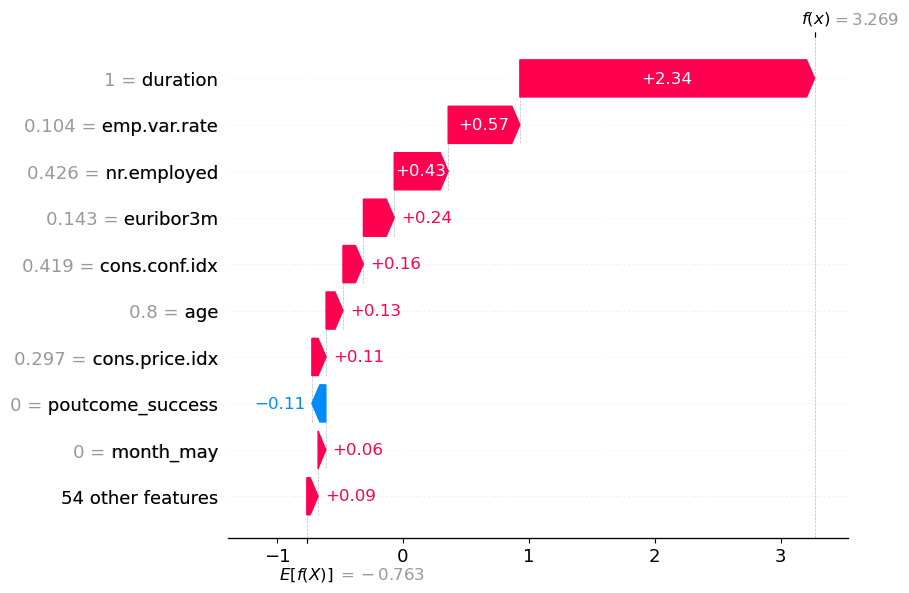

In [67]:
# Tính shap.Explanation object thay vì mảng
X_test_proc_df_lgb = pd.DataFrame(X_test_proc_lgb, columns=all_feature_names)

shap_values_exp_lgb = explainer_lgb(X_test_proc_df_lgb, check_additivity=False)  # cần để dùng waterfall plot
shap.plots.waterfall(shap_values_exp_lgb[0], max_display=10)

### **7. CatBoost**

In [68]:
pipeline_cat = Pipeline([
    ("preprocessing", preprocessing),
    ("ros", RandomOverSampler(random_state=42)),
    ("model", CatBoostClassifier(verbose=0))
])

# Tập tham số cần tuning cho CatBoost
param_dist_cat = {
    'model__iterations': [200, 300, 500],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__depth': [4, 6, 8, 10],
    'model__l2_leaf_reg': [1, 3, 5, 7, 9],    
    'model__border_count': [32, 64, 128],     
    'model__bagging_temperature': [0, 1, 5, 10]
}

random_search_cat = RandomizedSearchCV(
    estimator=pipeline_cat,
    param_distributions=param_dist_cat,
    n_iter=30,                      
    scoring="balanced_accuracy",
    cv=5,                           
    random_state=42,
    n_jobs=-1
)


random_search_cat.fit(X_train, y_train)

print("Best parameters for CatBoost:", random_search_cat.best_params_)
print("Best cross-validation balanced accuracy for CatBoost:", random_search_cat.best_score_)

Best parameters for CatBoost: {'model__learning_rate': 0.1, 'model__l2_leaf_reg': 9, 'model__iterations': 200, 'model__depth': 4, 'model__border_count': 128, 'model__bagging_temperature': 0}
Best cross-validation balanced accuracy for CatBoost: 0.8935224745606447


In [69]:
best_model_cat = random_search_cat.best_estimator_

#predictnhãn và xác suất
test_preds_cat = best_model_cat.predict(X_test)
test_probs_cat = best_model_cat.predict_proba(X_test)[:, 1]  # Xác suất lớp 1

#Balanced Accuracy
test_bal_acc_cat = balanced_accuracy_score(y_test, test_preds_cat)
print("\nTest Balanced Accuracy (CatBoost):", test_bal_acc_cat)

#confusion matrix và classification report
cm_cat = confusion_matrix(y_test, test_preds_cat)
print("\nConfusion Matrix (CatBoost):")
print(cm_cat)
print("\nClassification Report (CatBoost):")
print(classification_report(y_test, test_preds_cat))

tn, fp, fn, tp = cm_cat.ravel()
sensitivity_cat = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity_cat = tn / (tn + fp) if (tn + fp) > 0 else 0

pr_auc_cat = average_precision_score(y_test, test_probs_cat)
roc_auc_cat = roc_auc_score(y_test, test_probs_cat)

results_cat = {
    'Model': 'CatBoost',
    'Balanced Accuracy': test_bal_acc_cat,
    'Sensitivity': sensitivity_cat,
    'Specificity': specificity_cat,
    'PR-AUC': pr_auc_cat,
    'ROC-AUC': roc_auc_cat
}

results.append(results_cat)


Test Balanced Accuracy (CatBoost): 0.8901124347296654

Confusion Matrix (CatBoost):
[[6222 1043]
 [  74  897]]

Classification Report (CatBoost):
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      7265
           1       0.46      0.92      0.62       971

    accuracy                           0.86      8236
   macro avg       0.73      0.89      0.77      8236
weighted avg       0.93      0.86      0.88      8236



In [70]:
df_misclassified_cat = get_misclassified_cases(X_test, y_test, test_preds_cat, model_name="CatBoost")

df_uncertain_cat = get_uncertain_cases(
    X_test,
    y_test,
    test_preds_cat,
    test_probs_cat,
    model_name="CatBoost"
)


[CatBoost]
Số quan sát trong tập test: 8236
Số quan sát bị phân loại sai: 1117
Tỉ lệ sai: 13.56%

[CatBoost]
Tổng số mẫu trong tập test: 8236
Số mẫu không chắc chắn (0.45–0.55): 189
Số dự đoán đúng trong vùng không chắc chắn: 106
Số dự đoán sai trong vùng không chắc chắn: 83
Tỉ lệ dự đoán đúng trong vùng không chắc chắn: 56.08%


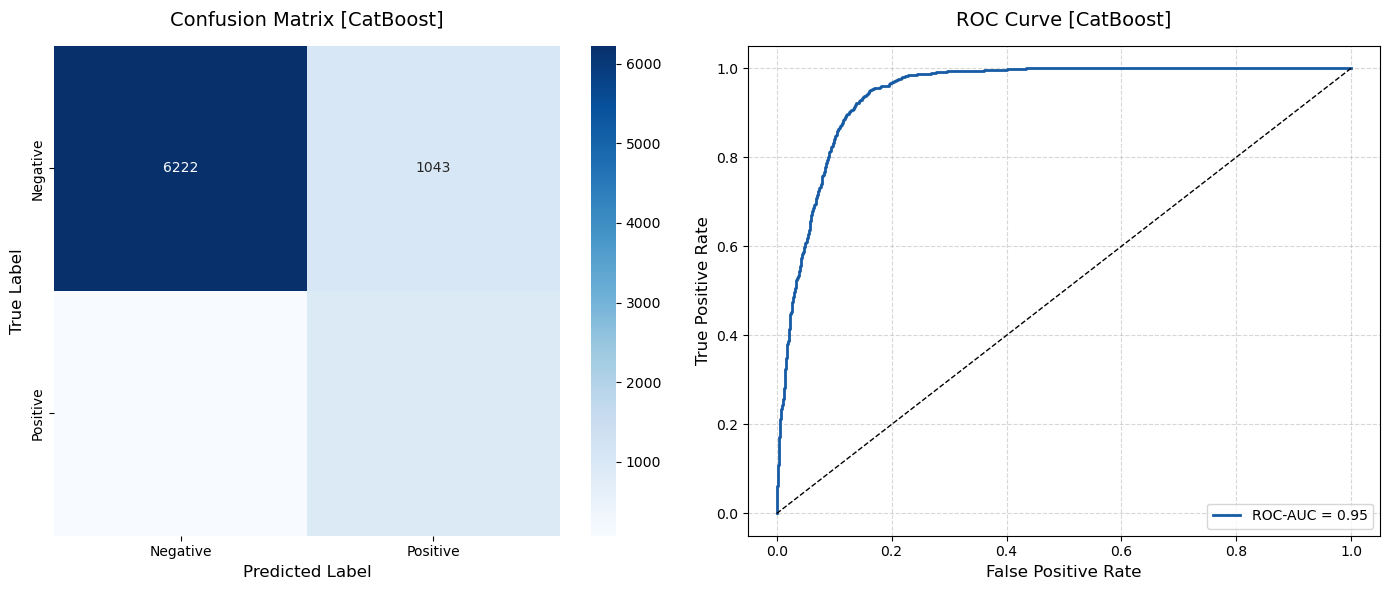

In [71]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  

# Confusion Matrix
cm_cat = confusion_matrix(y_test, test_preds_cat)
sns.heatmap(cm_cat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'], ax=axs[0])

axs[0].set_xlabel('Predicted Label', fontsize=12)
axs[0].set_ylabel('True Label', fontsize=12)
axs[0].set_title('Confusion Matrix [CatBoost]', fontsize=14, pad=15)

# ROC Curve
fpr_cat, tpr_cat, _ = roc_curve(y_test, test_probs_cat)
roc_auc_cat = roc_auc_score(y_test, test_probs_cat)

axs[1].plot(fpr_cat, tpr_cat, label=f'ROC-AUC = {roc_auc_cat:.2f}', color='#165ba3', linewidth=2)
axs[1].plot([0, 1], [0, 1], 'k--', linewidth=1)
axs[1].set_xlabel('False Positive Rate', fontsize=12)
axs[1].set_ylabel('True Positive Rate', fontsize=12)
axs[1].set_title('ROC Curve [CatBoost]', fontsize=14, pad=15)
axs[1].legend()
axs[1].grid(True, linestyle='--', alpha=0.5)

# Điều chỉnh layout
plt.tight_layout()
plt.show()

In [72]:
model_cat = best_model_cat.named_steps['model']
model_cat

In [73]:
best_model_cat

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier',
                                                                   HandlingOutliers(numerical_columns=['age',
                                                                                                       'duration',
                                                                                                       'campaign',
                                                                                                       'pdays',
                                                                                                       'previous',
                                                                                                       'emp.var.rate',
                                                                                                       'cons.price.idx',
                                                                                                       'cons.conf.idx',
                                                                                                       'euribor3m',
                                                                                                       'nr.employed'])),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('ros', RandomOverSampler(random_state=42)),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x2d0b507d0>)])

In [74]:
importances_cat = model_cat.get_feature_importance()

feature_importance_df_cat = pd.DataFrame({
    'Feature': feature_names_after_preprocessing,
    'Importance': importances_cat
})

feature_importance_df_cat = feature_importance_df_cat.sort_values(by='Importance', ascending=False).reset_index(drop=True)
feature_importance_df_cat

Feature  Importance
0          duration   44.189853
1       nr.employed   15.207413
2         euribor3m    8.620626
3    cons.price.idx    7.552891
4      emp.var.rate    6.808710
..              ...         ...
58          loan_no    0.000000
59      housing_yes    0.000000
60         previous    0.000000
61  marital_married    0.000000
62   job_management    0.000000

[63 rows x 2 columns]

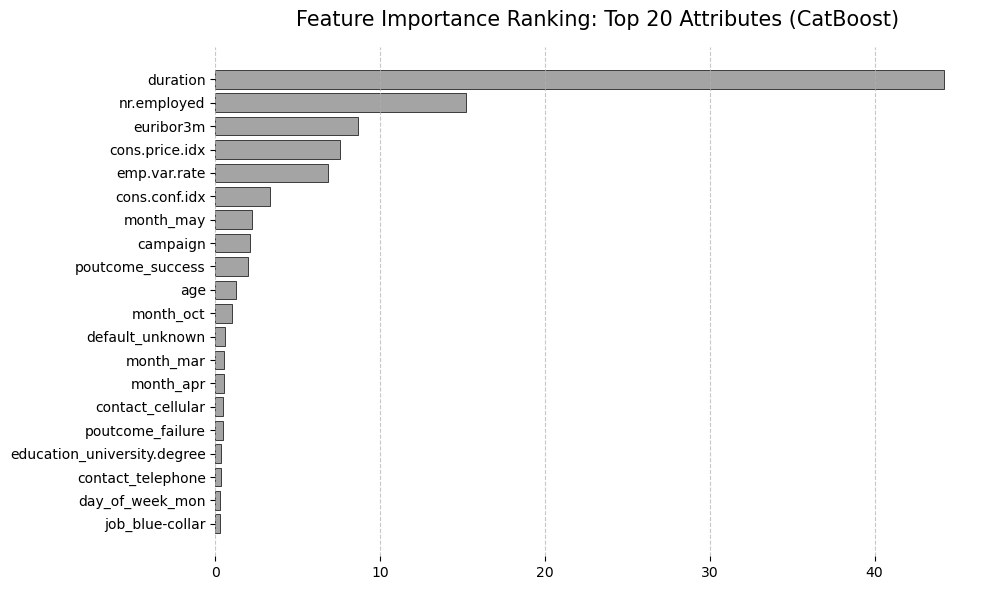

In [75]:
top_n = 20

plt.figure(figsize=(10, 6))
plt.barh(
    feature_importance_df_cat['Feature'].iloc[:top_n],
    feature_importance_df_cat['Importance'].iloc[:top_n],
    color='#a4a4a4',
    edgecolor='black',
    linewidth=0.5  
)

sns.despine(left=True, bottom=True)   # bỏ viền trái và dưới

plt.title('Feature Importance Ranking: Top 20 Attributes (CatBoost)', fontsize=15, color='black', pad=15)
plt.gca().invert_yaxis()
plt.grid(axis='y', visible=False)    
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


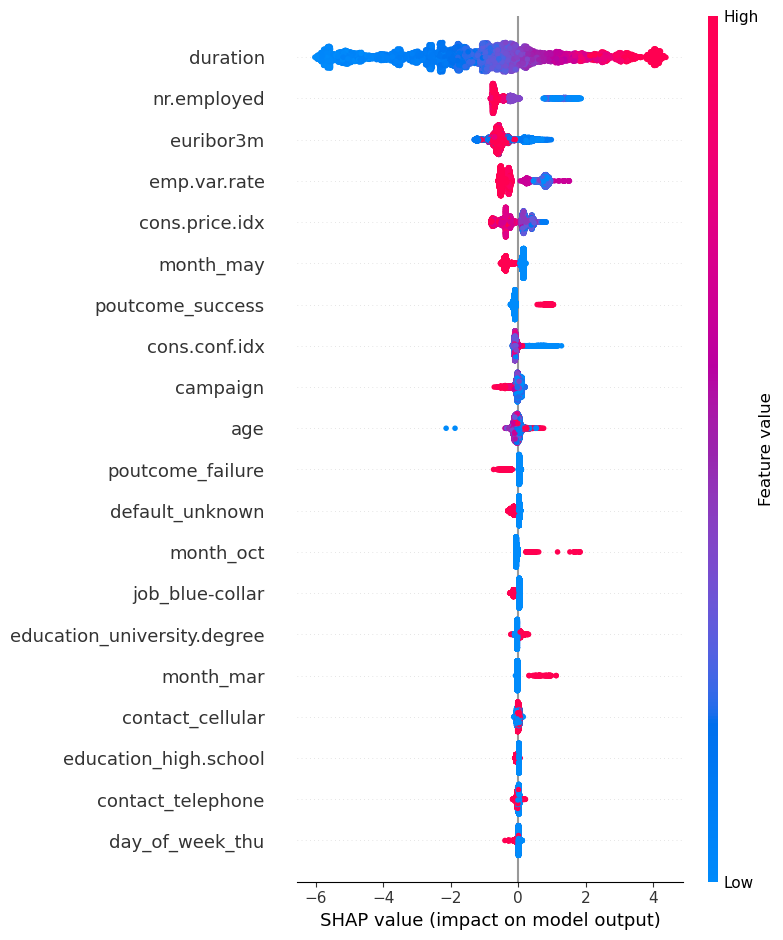

TypeError: The waterfall plot requires an `Explanation` object as the `shap_values` argument.

In [77]:
#chuẩn hóa dữ liệu test để đưa vào SHAP (chỉ áp dụng preprocessing, không oversampling)
X_test_proc_cat = best_model_cat.named_steps['preprocessing'].transform(X_test)

#khởi tạo SHAP explainer cho CatBoost
explainer_cat = shap.TreeExplainer(model_cat)

#tính toán giá trị SHAP cho tập test
shap_values = explainer_cat.shap_values(X_test_proc)

#lấy danh sách feature sau khi transform
ohe_feature_names = best_model_cat.named_steps['preprocessing'].named_transformers_['cat']['encoder'].get_feature_names_out(categorical_columns)
num_feature_names = numerical_columns
all_feature_names = list(num_feature_names) + list(ohe_feature_names)

shap.summary_plot(shap_values, X_test_proc_cat, feature_names=all_feature_names)
shap.plots.waterfall(shap_values[0])

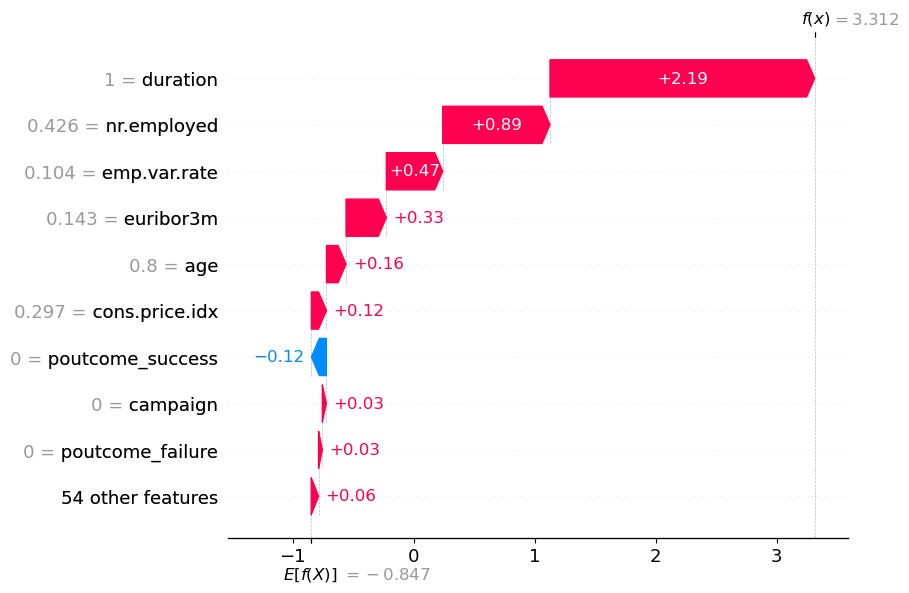

In [78]:
X_test_proc_df_cat = pd.DataFrame(X_test_proc_cat, columns=all_feature_names)

shap_values_exp_cat = explainer_cat(X_test_proc_df_cat, check_additivity=False)  # cần để dùng waterfall plot
shap.plots.waterfall(shap_values_exp_cat[0], max_display=10)

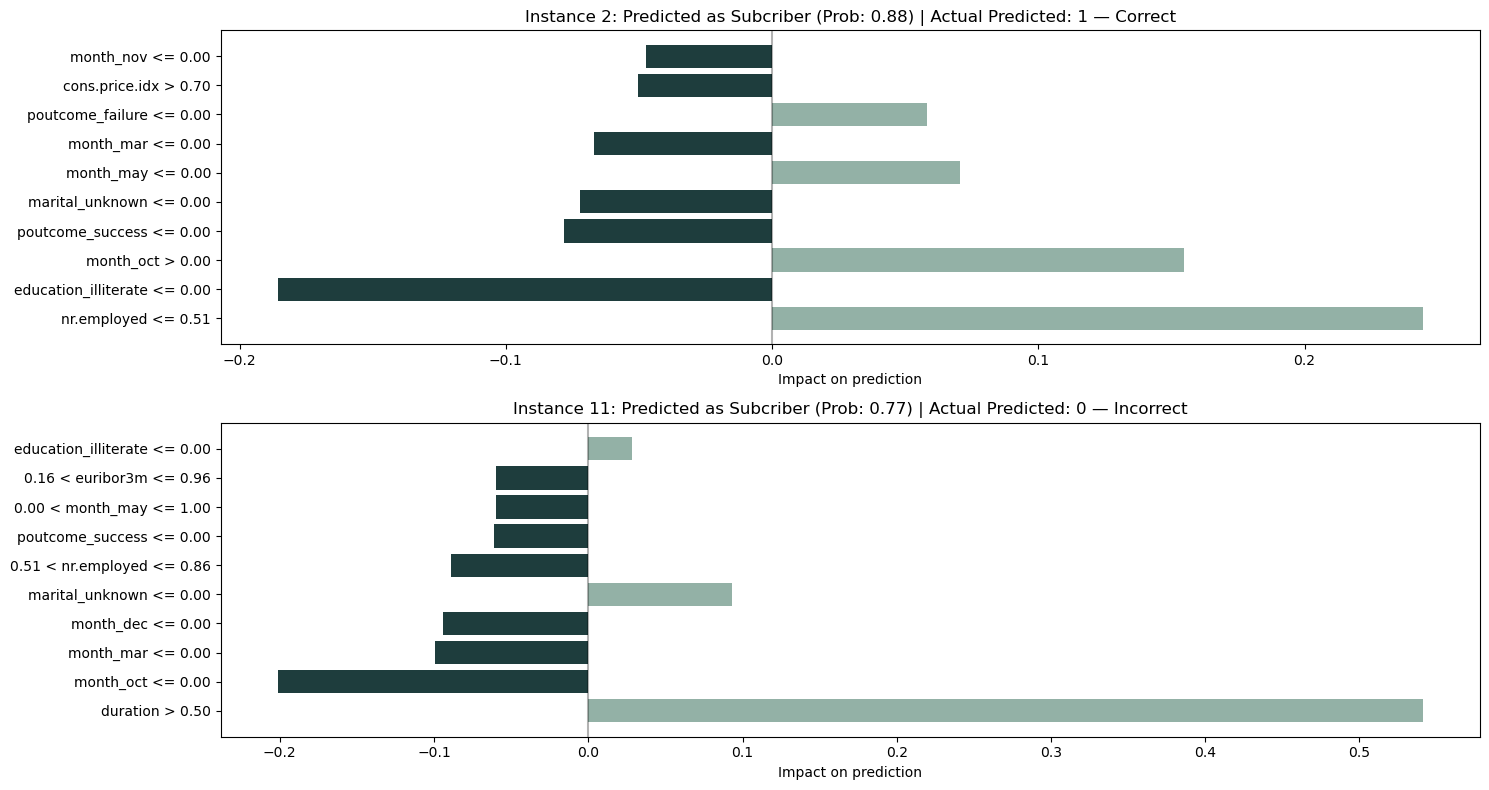

In [104]:
# Import LIME
import lime
import lime.lime_tabular

# Create a LIME explainer for the CatBoost model
# We need to provide the training data and feature names
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    X_test_proc_cat,  # Use the processed test data
    feature_names=all_feature_names,
    class_names=['Subcriber','No-Subcriber'],  # Adjust based on your target classes
    mode='classification',
    random_state=42
)

# Select an instance to explain (e.g., the first test instance)
instance_idx = 0  # You can change this to any index you're interested in
instance = X_test_proc_cat[instance_idx]

# Generate LIME explanation
# We need to create a prediction function for LIME that returns class probabilities
def predict_fn(x):
    return model_cat.predict_proba(x)

# Get the explanation for the selected instance
lime_explanation = lime_explainer.explain_instance(
    instance, 
    predict_fn,
    num_features=10  # Number of features to include in the explanation
)

# Visualize the explanation
lime_explanation.show_in_notebook()
lime_explanation.save_to_file('lime_explanation.html')


# Chọn một số instance để giải thích
instances_to_explain = [2, 11]  # Bạn có thể chọn bất kỳ các chỉ số nào bạn quan tâm
num_features = 10  # Số lượng đặc trưng quan trọng nhất để hiển thị

# Tạo figure với kích thước phù hợp
plt.figure(figsize=(15, 4 * len(instances_to_explain)))

# Loop qua các instance và tạo giải thích
for i, idx in enumerate(instances_to_explain):
    # Lấy instance để giải thích
    instance = X_test_proc_cat[idx]
    
    # Tạo giải thích LIME
    exp = lime_explainer.explain_instance(
        instance, 
        predict_fn,
        num_features=num_features
    )
    
    # Tạo subplot
    plt.subplot(len(instances_to_explain), 1, i+1)
    
    # Lấy danh sách đặc trưng và trọng số
    feature_importance = exp.as_list()
    features = [x[0] for x in feature_importance]
    weights = [x[1] for x in feature_importance]
    
    # Tạo bar chart
    colors = ['#1E3D3D' if w < 0 else '#93B1A6' for w in weights]
    positions = np.arange(len(features))
    plt.barh(positions, weights, color=colors)
    plt.yticks(positions, features)
    
    # Thêm thông tin về dự đoán
    probs = predict_fn(instance.reshape(1, -1))[0]
    pred_class = 'Subcriber' if probs[1] > 0.5 else 'No-Subcriber'
    # plt.title(f'Instance {idx}: Predicted as {pred_class} (Prob: {probs[1]:.2f})')
    true_class = y_test.iloc[idx]  # hoặc y_test[idx] tùy kiểu dữ liệu
    status = 'Correct' if pred_class == ('Subcriber' if true_class == 1 else 'No-Subcriber') else 'Incorrect'

    title_text = f'Instance {idx}: Predicted as {pred_class} (Prob: {probs[1]:.2f}) | Actual Predicted: {true_class} — {status}'
    plt.title(title_text)

    # Thêm đường dọc tại x=0 để phân biệt tác động tích cực và tiêu cực
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    # Thêm nhãn
    plt.xlabel('Impact on prediction')

plt.subplots_adjust(hspace=1)
plt.tight_layout()
plt.savefig('lime_multiple_instances.png')
plt.show()

In [89]:
X_test.head(15)

age           job  marital            education  default housing loan  \
36264   59       retired  married  professional.course       no     yes  yes   
32672   34   blue-collar  married             basic.9y       no      no   no   
40872   32    technician  married  professional.course       no     yes   no   
32907   53        admin.  married          high.school       no     yes  yes   
16464   24      services   single             basic.9y       no     yes   no   
29634   37    technician   single  professional.course       no      no   no   
26080   29        admin.  married    university.degree       no      no   no   
1558    31   blue-collar   single  professional.course       no      no   no   
12923   27        admin.   single          high.school       no      no   no   
4266    47      services  married          high.school       no      no   no   
26480   34  entrepreneur  married    university.degree       no     yes   no   
1283    51   blue-collar  married             basic.4y  unknown      no   no   
11207   43    technician  married             basic.9y  unknown     yes   no   
15988   58       retired  married  professional.course  unknown      no   no   
25520   43        admin.  married    university.degree       no      no   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
36264   cellular   jun         mon      1460         1     -1         0   
32672   cellular   may         mon       248         1     -1         1   
40872   cellular   oct         wed       275         2     -1         0   
32907   cellular   may         mon       186         2     -1         1   
16464  telephone   jul         wed       184         1     -1         0   
29634   cellular   apr         mon       147         1     -1         0   
26080   cellular   nov         wed       406         3     -1         0   
1558   telephone   may         thu        99         3     -1         0   
12923   cellular   jul         tue       185         1     -1         0   
4266   telephone   may         tue        98         1     -1         0   
26480   cellular   nov         thu        69         1     -1         1   
1283   telephone   may         thu       665         1     -1         0   
11207  telephone   jun         thu       487         1     -1         0   
15988  telephone   jul         tue        44         8     -1         0   
25520   cellular   nov         wed        97         1     -1         0   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
36264  nonexistent          -2.9          92.963          -40.8      1.266   
32672      failure          -1.8          92.893          -46.2      1.299   
40872  nonexistent          -1.1          94.601          -49.5      0.959   
32907      failure          -1.8          92.893          -46.2      1.299   
16464  nonexistent           1.4          93.918          -42.7      4.963   
29634  nonexistent          -1.8          93.075          -47.1      1.405   
26080  nonexistent          -0.1          93.200          -42.0      4.120   
1558   nonexistent           1.1          93.994          -36.4      4.855   
12923  nonexistent           1.4          93.918          -42.7      4.962   
4266   nonexistent           1.1          93.994          -36.4      4.856   
26480      failure          -0.1          93.200          -42.0      4.076   
1283   nonexistent           1.1          93.994          -36.4      4.855   
11207  nonexistent           1.4          94.465          -41.8      4.961   
15988  nonexistent           1.4          93.918          -42.7      4.961   
25520  nonexistent          -0.1          93.200          -42.0      4.120   

       nr.employed  
36264       5076.2  
32672       5099.1  
40872       4963.6  
32907       5099.1  
16464       5228.1  
29634       5099.1  
26080       5195.8  
1558        5191.0  
12923       5228.1  
4266        5191.0  
26480       5195.8  
1283        5191.0  
112

In [90]:
y_test.head(15)

36264    1
32672    0
40872    1
32907    0
16464    0
29634    0
26080    0
1558     0
12923    0
4266     0
26480    0
1283     0
11207    0
15988    0
25520    0
Name: y, dtype: int64

### **10. Summary results**

**BASELINE MODELS**

In [ ]:
print("\nModel Performance Summary (before Hyperparameter tuning):")
df_results_sorted


Model Performance Summary (before Hyperparameter tuning):


train_score_mean  val_score_mean  test_score_voting  \
LightGBM                     0.931197        0.891731           0.890573   
CatBoost                     0.951400        0.874679           0.881021   
Gradient Boosting            0.896847        0.887256           0.879868   
XGBoost                      0.960180        0.862096           0.869565   
Logistic regression          0.881649        0.879993           0.866645   
Random forest                0.999962        0.754341           0.761529   
Naive bayes                  0.753903        0.751100           0.757261   
K-nearest neighbors          0.946937        0.736210           0.735031   

                     sensitivity  specificity   roc_auc  
LightGBM                0.912461     0.868685  0.946819  
CatBoost                0.872297     0.889745  0.947776  
Gradient Boosting       0.915551     0.844184  0.942794  
XGBoost                 0.841401     0.897729  0.944006  
Logistic regression     0.893924     0.839367  0.931052  
Random forest           0.570546     0.952512  0.939224  
Naive bayes             0.771370     0.743152  0.821360  
K-nearest neighbors     0.628218     0.841844  0.809795

**AFTER HYPERPARAMETER TUNING**

In [ ]:
results_df = pd.DataFrame(results)

results_df.loc[results_df['Model'] == 'SVM', ['PR-AUC', 'ROC-AUC']] = [0, 0]

results_df = results_df.dropna()
results_df = results_df.drop_duplicates()
results_df = results_df.sort_values(by='Balanced Accuracy', ascending=False).reset_index(drop=True)

print("\nModel Performance Summary (after Hyperparameter tuning):")
results_df


Model Performance Summary (after Hyperparameter tuning):


Model  Balanced Accuracy  Sensitivity  Specificity    PR-AUC  \
0             CatBoost           0.890112     0.923790     0.856435  0.666132   
1             LightGBM           0.887049     0.924820     0.849277  0.670651   
2    Gradient Boosting           0.886712     0.918641     0.854783  0.653176   
3        Random Forest           0.880039     0.916581     0.843496  0.637724   
4  Logistic Regression           0.868397     0.897013     0.839780  0.589361   
5          Naive Bayes           0.759275     0.784758     0.733792  0.389211   
6  K-Nearest Neighbors           0.758246     0.725026     0.791466  0.358760   

    ROC-AUC  
0  0.946877  
1  0.947259  
2  0.944382  
3  0.937428  
4  0.931279  
5  0.821091  
6  0.810847

**MISCLASSIFIED SUMMARY**

In [ ]:
misclassified_summary_df = pd.DataFrame(misclassified_summary).T.reset_index()
misclassified_summary_df = misclassified_summary_df.rename(columns={'index': 'Model'})

misclassified_summary_df['Total Test Samples'] = misclassified_summary_df['Total Test Samples'].astype(int)
misclassified_summary_df['Misclassified Samples'] = misclassified_summary_df['Misclassified Samples'].astype(int)
misclassified_summary_df['Misclassification Rate'] = (misclassified_summary_df['Misclassification Rate'] * 100).round(2)

misclassified_summary_df = misclassified_summary_df.sort_values(by='Misclassified Samples', ascending=False).reset_index(drop=True)

misclassified_summary_df


Model  Total Test Samples  Misclassified Samples  \
0          Naive Bayes                8236                   2143   
1  K-Nearest Neighbors                8236                   1782   
2  Logistic Regression                8236                   1264   
3        Random Forest                8236                   1218   
4             LightGBM                8236                   1168   
5    Gradient Boosting                8236                   1134   
6             CatBoost                8236                   1117   

   Misclassification Rate  
0                   26.02  
1                   21.64  
2                   15.35  
3                   14.79  
4                   14.18  
5                   13.77  
6                   13.56

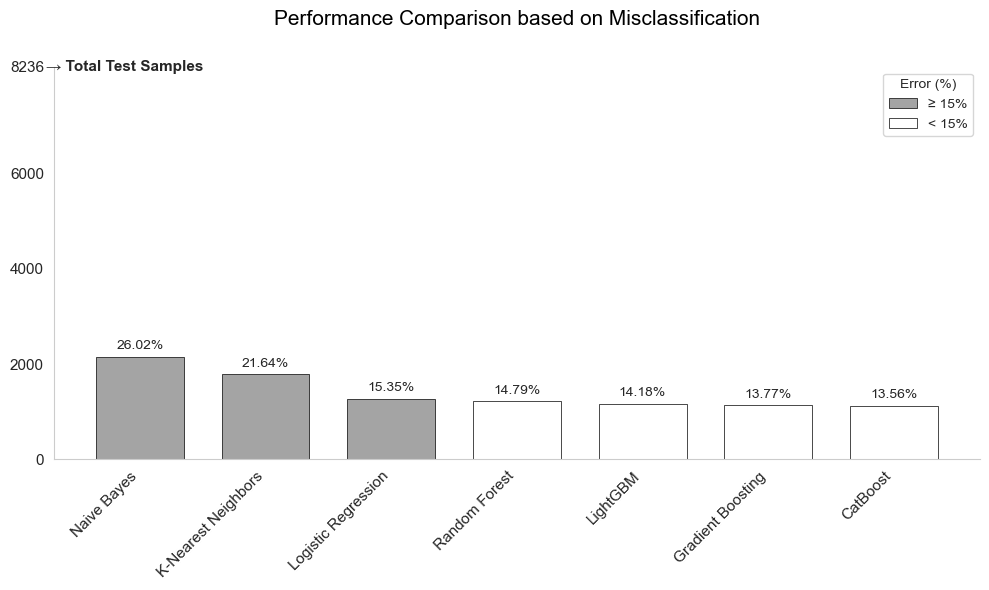

In [ ]:
sns.set_style("whitegrid")

total_samples = 8236

plt.figure(figsize=(10, 6))
colors = []
for rate in misclassified_summary_df['Misclassification Rate']:
    if rate < 15:
        colors.append('white')  # <15% --> màu xanh
    else:
        colors.append('#a4a4a4')  # >=15% --> màu đỏ

bars = plt.bar(
    misclassified_summary_df['Model'],
    misclassified_summary_df['Misclassified Samples'],
    width=0.7,
    color=colors,
    edgecolor='black',
    linewidth=0.5 
)

sns.despine(top=True, right=True)

plt.title('Performance Comparison based on Misclassification', fontsize=15, color='black', pad=30)
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.yticks([0, 2000, 4000, 6000, total_samples], fontsize=11)
plt.ylim(0, total_samples)
plt.grid(False)

for index, sample in enumerate(misclassified_summary_df['Misclassified Samples']):
    rate_percent = (sample / total_samples) * 100
    plt.text(index, sample + 100, f'{rate_percent:.2f}%', ha='center', va='bottom', fontsize=10)

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#a4a4a4', edgecolor='black', linewidth=0.5, label='≥ 15%'),
    Patch(facecolor='white', edgecolor='black', linewidth=0.5, label='< 15%')
]

plt.text(
    x=-0.75,                 
    y=total_samples -160,    
    s=f"→ Total Test Samples",
    fontsize=11,
    ha='left',
    va='bottom',
    fontweight='bold'
)

plt.legend(handles=legend_elements, title='Error (%)', loc='upper right', fontsize=10, title_fontsize=10)
plt.tight_layout()
plt.show()

**UNCERTAIN CASES SUMMARY**

In [ ]:
uncertain_summary_df = pd.DataFrame(uncertain_summary).T.reset_index()
uncertain_summary_df = uncertain_summary_df.rename(columns={'index': 'Model'})

uncertain_summary_df[['Total Test Samples', 'Uncertain Samples', 'Correct Predictions', 'Wrong Predictions']] = \
uncertain_summary_df[['Total Test Samples', 'Uncertain Samples', 'Correct Predictions', 'Wrong Predictions']].astype('Int64')

uncertain_summary_df['Correct Rate (%)'] = (uncertain_summary_df['Correct Rate'] * 100).round(2)
uncertain_summary_df = uncertain_summary_df.sort_values(by='Uncertain Samples', ascending=False).reset_index(drop=True)
uncertain_summary_df = uncertain_summary_df.drop(columns=['Correct Rate'])

uncertain_summary_df

Model  Total Test Samples  Uncertain Samples  \
0        Random Forest                8236                377   
1  Logistic Regression                8236                232   
2             LightGBM                8236                205   
3    Gradient Boosting                8236                192   
4             CatBoost                8236                189   
5          Naive Bayes                8236                 91   
6  K-Nearest Neighbors                8236                  0   

   Correct Predictions  Wrong Predictions  Correct Rate (%)  
0                  189                188             50.13  
1                  113                119             48.71  
2                   99                106             48.29  
3                  106                 86             55.21  
4                  106                 83             56.08  
5                   47                 44             51.65  
6                    0                  0               NaN

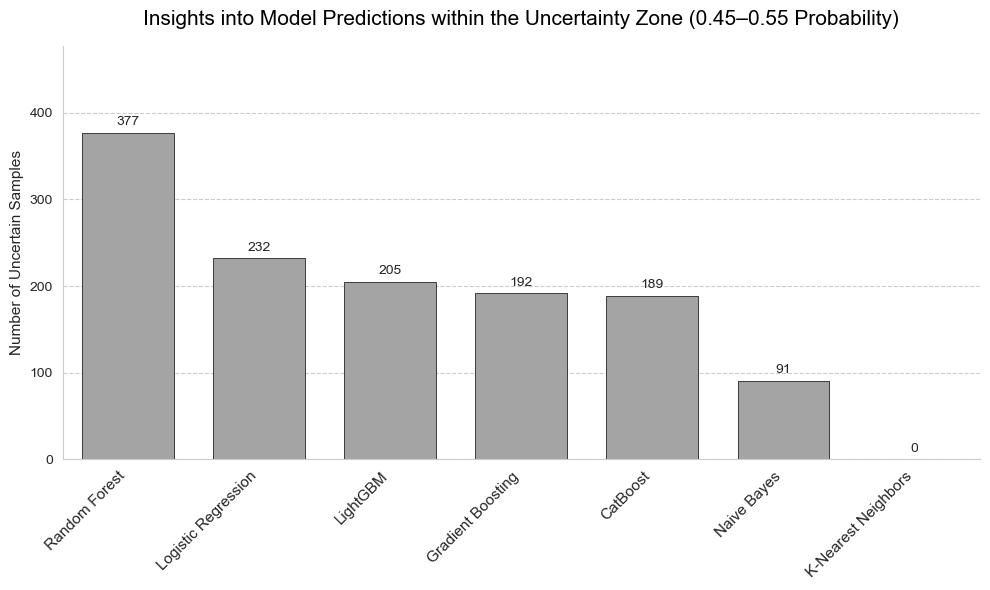

In [ ]:
# Set seaborn style (mỏng nhẹ)
sns.set_style("whitegrid", {'grid.linestyle': '--', 'grid.linewidth': 0.5})

plt.figure(figsize=(10, 6))

# Vẽ bar chart
bars = sns.barplot(
    x='Model',
    y='Uncertain Samples',
    data=uncertain_summary_df,
    color='#a4a4a4',
    edgecolor='black',
    linewidth=0.5,
    width=0.7
)

sns.despine(top=True, right=True)

# Thêm số lượng trên mỗi cột
for index, value in enumerate(uncertain_summary_df['Uncertain Samples']):
    plt.text(index, value + 5, int(value), ha='center', va='bottom', fontsize=10)

# Tùy chỉnh
plt.title('Insights into Model Predictions within the Uncertainty Zone (0.45–0.55 Probability)', color='black', fontsize=15, pad=15)
plt.xlabel('')
plt.ylabel('Number of Uncertain Samples', fontsize=11)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.ylim(0, uncertain_summary_df['Uncertain Samples'].max() + 100)

plt.tight_layout()
plt.show()


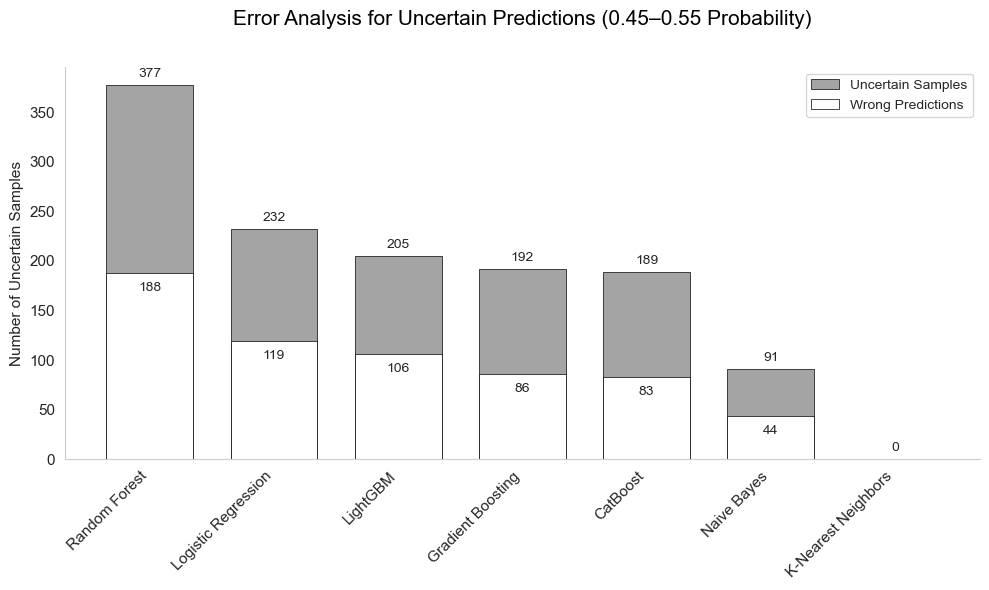

In [ ]:
# Set seaborn style
sns.set_style("whitegrid", {'grid.linestyle': '--', 'grid.linewidth': 0.5})

# Tạo figure
plt.figure(figsize=(10, 6))

# Dữ liệu
models = uncertain_summary_df['Model']
uncertain_samples = uncertain_summary_df['Uncertain Samples']
wrong_predictions = uncertain_summary_df['Wrong Predictions']
correct_predictions = uncertain_samples - wrong_predictions

# Bar chính: uncertain samples
plt.bar(models, uncertain_samples, color='#a4a4a4', edgecolor='black', linewidth=0.5, label='Uncertain Samples', width=0.7)

# Bar phụ: wrong predictions (nằm chồng lên)
plt.bar(models, wrong_predictions, color='white', edgecolor='black', linewidth=0.5, label='Wrong Predictions',width=0.7)

# Thêm số lượng
for index, (uncertain, wrong) in enumerate(zip(
    uncertain_summary_df['Uncertain Samples'], uncertain_summary_df['Wrong Predictions'])):
    if uncertain >= 0:
        plt.text(index, uncertain + 5, int(uncertain), ha='center', va='bottom', fontsize=10)
    if wrong > 0:
        plt.text(index, wrong - 15, int(wrong), ha='center', va='center', fontsize=10)


# Tùy chỉnh
plt.title('Error Analysis for Uncertain Predictions (0.45–0.55 Probability)', fontsize=15, color='black', pad=30)
plt.ylabel('Number of Uncertain Samples', fontsize=11)
plt.xlabel('')
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)

# Legend
plt.legend(fontsize=10, title_fontsize=11)

# Xóa viền trên và phải
sns.despine(top=True, right=True)
plt.grid(False) 

plt.tight_layout()
plt.show()


In [ ]:
top_n = 20
fig, axes = plt.subplots(2, 2, figsize=(16, 16))  # 2 hàng, 2 cột

models = {
    'Random Forest': feature_importance_df_rf,
    'Gradient Boosting': feature_importance_df_gb,
    'LightGBM': feature_importance_df_lgb,
    'CatBoost': feature_importance_df_cat
}

axes = axes.flatten()  # Đưa về dạng 1 chiều để dễ loop

for ax, (model_name, df) in zip(axes, models.items()):
    sns.despine(left=True, bottom=True)
    ax.barh(
        df['Feature'].iloc[:top_n],
        df['Importance'].iloc[:top_n],
        color='#a4a4a4', edgecolor='black', linewidth=0.5
    )
    ax.set_title(f'Top {top_n} Importance Features: {model_name}', fontsize=16)
    ax.invert_yaxis()
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    ax.set_xlabel('Importance')
    ax.set_ylabel('')
    ax.tick_params(axis='y', labelsize=14)  


plt.tight_layout()
plt.subplots_adjust(hspace=0.2) 
plt.show()

NameError: name 'plt' is not defined